In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [2]:
atlas_name = 'atlasV5'

# Generate transformed annotation volume meshes

Untransformed annotation volume meshes are generated in `visualize_annotationVolume_v2`

In [3]:
warp_setting = 9

In [4]:
stack_fixed = 'MD589'
stacks_moving = ['MD594', 'MD585']
# stacks_moving = ['MD585']

In [5]:
# rel2uncropped should be more accurately described as rel2uncroppedFixed

In [6]:
vol_f_xmin_rel2uncropped, vol_f_xmax_rel2uncropped, \
vol_f_ymin_rel2uncropped, vol_f_ymax_rel2uncropped, \
vol_f_zmin_rel2uncropped, vol_f_zmax_rel2uncropped = \
DataManager.load_original_volume_bbox(stack_fixed, volume_type='annotation', downscale=32)

# print vol_f_xmin, vol_f_xmax, vol_f_ymin, vol_f_ymax, vol_f_zmin, vol_f_zmax
# This is the bbox of annotation volume in aligned uncropped specimen space.

In [7]:
! rm -r /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp8_MD589_down32_annotationAsScoreVolume/
! rm -r /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/
! rm -r /home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp8_MD589_down32_annotationAsScoreVolume/
! rm -r /home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/

rm: cannot remove '/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp8_MD589_down32_annotationAsScoreVolume/': No such file or directory
rm: cannot remove '/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp8_MD589_down32_annotationAsScoreVolume/': No such file or directory


In [11]:
for stack_moving in stacks_moving:

    for name_s in all_known_structures_sided:
        print name_s

        try:
            vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                warp_setting=warp_setting,
                                                structure=name_s)

            bbox_rel2fixed = DataManager.load_transformed_volume_bbox(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                warp_setting=warp_setting,
                                                structure=name_s)
        except Exception as e:
            sys.stderr.write('Cannot load volume %s: %s\n' % (name_s, e))
            continue

    #     xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(vol)
    #     vol_inbbox = vol[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1].astype(np.float)

        t = time.time()
        # These origins are with respect to aligned uncropped specimen space.
        polydata_rel2uncropped = volume_to_polydata(vol, 
                                                    origin=(vol_f_xmin_rel2uncropped + bbox_rel2fixed[0], 
                                                           vol_f_ymin_rel2uncropped + bbox_rel2fixed[2], 
                                                           vol_f_zmin_rel2uncropped + bbox_rel2fixed[4]), 
                                                    num_simplify_iter=3, smooth=True)
        sys.stderr.write('time: %.2f seconds.\n' % (time.time() - t) )

        fp = DataManager.get_mesh_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                           vol_type_f='annotationAsScore',
                                           vol_type_m='annotationAsScore',
                                           structure=name_s, warp_setting=warp_setting)
        create_parent_dir_if_not_exists(fp)
        save_mesh_stl(polydata_rel2uncropped, fp)
        upload_to_s3(fp)
        
        del vol, polydata_rel2uncropped

5N_L
aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_L.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7524: 0.08 seconds
simplify 1 @ 1506: 0.05 seconds
simplify 2 @ 302: 0.01 seconds
time: 0.19 seconds.


5N_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R_bbox.txt" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R_bbox.txt" "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R_bbox.txt"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6988: 0.06 seconds
simplify 1 @ 1399: 0.05 seconds
simplify 2 @ 281: 0.01 seconds
time: 0.15 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R.stl"
6N_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L_bbox.txt" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD5

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1062: 0.01 seconds
simplify 1 @ 214: 0.01 seconds
simplify 2 @ 44: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L.stl"
6N_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R_bbox.txt" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD5

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 698: 0.01 seconds
simplify 1 @ 141: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R.stl"
7N_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L_bbox.txt" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD5

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12511: 0.10 seconds
simplify 1 @ 2505: 0.09 seconds
simplify 2 @ 502: 0.02 seconds
time: 0.26 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L.stl"
7N_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12537: 0.11 seconds
simplify 1 @ 2509: 0.10 seconds
simplify 2 @ 503: 0.02 seconds
time: 0.28 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.stl"
7n_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9417: 0.08 seconds
simplify 1 @ 1885: 0.07 seconds
simplify 2 @ 378: 0.02 seconds
time: 0.27 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.stl"
7n_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9523: 0.08 seconds
simplify 1 @ 1906: 0.07 seconds
simplify 2 @ 382: 0.02 seconds
time: 0.24 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.stl"
Amb_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1583: 0.02 seconds
simplify 1 @ 318: 0.01 seconds
simplify 2 @ 65: 0.00 seconds
time: 0.04 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.stl"
Amb_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1028: 0.01 seconds
simplify 1 @ 207: 0.01 seconds
simplify 2 @ 43: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.stl"
LC_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3236: 0.03 seconds
simplify 1 @ 648: 0.02 seconds
simplify 2 @ 131: 0.00 seconds
time: 0.07 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.stl"
LC_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3702: 0.04 seconds
simplify 1 @ 742: 0.02 seconds
simplify 2 @ 150: 0.01 seconds
time: 0.08 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.stl"
LRt_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10598: 0.09 seconds
simplify 1 @ 2121: 0.08 seconds
simplify 2 @ 425: 0.02 seconds
time: 0.24 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.stl"
LRt_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11316: 0.09 seconds
simplify 1 @ 2264: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.stl"
Pn_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_d

simplify 2 @ 454: 0.02 seconds
time: 0.24 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19305: 0.16 seconds
simplify 1 @ 3863: 0.17 seconds
simplify 2 @ 774: 0.03 seconds
time: 0.44 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.stl"
Pn_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18425: 0.17 seconds
simplify 1 @ 3686: 0.15 seconds
simplify 2 @ 738: 0.03 seconds
time: 0.42 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.stl"
Tz_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6055: 0.05 seconds
simplify 1 @ 1212: 0.04 seconds
simplify 2 @ 244: 0.01 seconds
time: 0.12 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.stl"
Tz_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5997: 0.05 seconds
simplify 1 @ 1201: 0.04 seconds
simplify 2 @ 241: 0.01 seconds
time: 0.12 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.stl"
VLL_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10969: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.stl"
VLL_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

simplify 1 @ 2195: 0.08 seconds
simplify 2 @ 440: 0.02 seconds
time: 0.28 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10919: 0.11 seconds
simplify 1 @ 2185: 0.08 seconds
simplify 2 @ 438: 0.02 seconds
time: 0.27 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.stl"
RMC_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5057: 0.04 seconds
simplify 1 @ 1013: 0.03 seconds
simplify 2 @ 204: 0.01 seconds
time: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.stl"
RMC_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9012: 0.07 seconds
simplify 1 @ 1804: 0.07 seconds
simplify 2 @ 362: 0.01 seconds
time: 0.20 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.stl"
SNC_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7522: 0.06 seconds
simplify 1 @ 1506: 0.05 seconds
simplify 2 @ 302: 0.01 seconds
time: 0.17 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.stl"
SNC_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8738: 0.06 seconds
simplify 1 @ 1749: 0.06 seconds
simplify 2 @ 351: 0.01 seconds
time: 0.19 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.stl"
SNR_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27432: 0.23 seconds
simplify 1 @ 5488: 0.25 seconds
simplify 2 @ 1099: 0.05 seconds
time: 0.68 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.stl"
SNR_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31499: 0.25 seconds
simplify 1 @ 6301: 0.31 seconds
simplify 2 @ 1261: 0.06 seconds
time: 0.77 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.stl"
3N_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2554: 0.02 seconds
simplify 1 @ 511: 0.02 seconds
simplify 2 @ 104: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.stl"
3N_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2256: 0.02 seconds
simplify 1 @ 452: 0.02 seconds
simplify 2 @ 92: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.stl"
4N_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 655: 0.01 seconds
simplify 1 @ 132: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.stl"
4N_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 760: 0.01 seconds
simplify 1 @ 153: 0.01 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.stl"
Sp5I_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.stl"
Sp5I_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_M

simplify 0 @ 15129: 0.18 seconds
simplify 1 @ 3027: 0.13 seconds
simplify 2 @ 606: 0.03 seconds
time: 0.40 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3825: 0.04 seconds
simplify 1 @ 766: 0.03 seconds
simplify 2 @ 154: 0.01 seconds
time: 0.09 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.stl"
Sp5O_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_M

marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18485: 0.26 seconds
simplify 1 @ 3698: 0.15 seconds
simplify 2 @ 741: 0.03 seconds
time: 0.55 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.stl"
Sp5O_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_M

marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7468: 0.15 seconds
simplify 1 @ 1495: 0.06 seconds
simplify 2 @ 300: 0.01 seconds
time: 0.27 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.stl"
Sp5C_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_M

marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29868: 0.32 seconds
simplify 1 @ 5976: 0.28 seconds
simplify 2 @ 1196: 0.06 seconds
time: 0.87 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.stl"
Sp5C_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_M

marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28372: 0.29 seconds
simplify 1 @ 5674: 0.31 seconds
simplify 2 @ 1136: 0.06 seconds
time: 0.86 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.stl"
PBG_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD5

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2445: 0.02 seconds
simplify 1 @ 490: 0.02 seconds
simplify 2 @ 99: 0.00 seconds
time: 0.06 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.stl"
PBG_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2134: 0.02 seconds
simplify 1 @ 428: 0.01 seconds
simplify 2 @ 87: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.stl"
10N_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5211: 0.04 seconds
simplify 1 @ 1043: 0.04 seconds
simplify 2 @ 210: 0.01 seconds
time: 0.12 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.stl"
10N_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4763: 0.03 seconds
simplify 1 @ 954: 0.03 seconds
simplify 2 @ 192: 0.01 seconds
time: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.stl"
VCA_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14526: 0.13 seconds
simplify 1 @ 2906: 0.11 seconds
simplify 2 @ 582: 0.02 seconds
time: 0.33 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.stl"
VCA_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13662: 0.11 seconds
simplify 1 @ 2734: 0.10 seconds
simplify 2 @ 548: 0.02 seconds
time: 0.30 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.stl"
VCP_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6062: 0.06 seconds
simplify 1 @ 1214: 0.04 seconds
simplify 2 @ 244: 0.01 seconds
time: 0.13 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.stl"
VCP_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7805: 0.06 seconds
simplify 1 @ 1562: 0.05 seconds
simplify 2 @ 314: 0.01 seconds
time: 0.17 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.stl"
DC_L
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12391: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.stl"
DC_R
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_dow

simplify 1 @ 2479: 0.09 seconds
simplify 2 @ 497: 0.02 seconds
time: 0.27 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14607: 0.12 seconds
simplify 1 @ 2923: 0.12 seconds
simplify 2 @ 586: 0.03 seconds
time: 0.33 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.stl"
AP
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2728: 0.02 seconds
simplify 1 @ 547: 0.02 seconds
simplify 2 @ 111: 0.01 seconds
time: 0.06 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.stl"
12N
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_an

marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13724: 0.10 seconds
simplify 1 @ 2746: 0.11 seconds
simplify 2 @ 550: 0.02 seconds
time: 0.29 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.stl"
RtTg
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down3

marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31681: 0.26 seconds
simplify 1 @ 6339: 0.29 seconds
simplify 2 @ 1269: 0.06 seconds
time: 0.75 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.stl"
sp5
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down3

File does not exist: /home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp
Cannot load volume sp5: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp'


outerContour
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp" "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp"


File does not exist: /home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp
Cannot load volume outerContour: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp'


SC
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.bp" "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.bp"
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD58

marching cube: 0.65 seconds
mesh_to_polydata: 0.15 seconds
simplify 0 @ 138090: 1.16 seconds
simplify 1 @ 27625: 1.51 seconds
simplify 2 @ 5525: 0.32 seconds
time: 3.86 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.stl"
IC
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_anno

marching cube: 0.41 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 102344: 0.94 seconds
simplify 1 @ 20471: 1.11 seconds
simplify 2 @ 4095: 0.22 seconds
time: 2.85 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.stl"
5N_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7479: 0.07 seconds
simplify 1 @ 1497: 0.05 seconds
simplify 2 @ 301: 0.01 seconds
time: 0.16 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_L.stl"
5N_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7000: 0.06 seconds
simplify 1 @ 1401: 0.05 seconds
simplify 2 @ 281: 0.01 seconds
time: 0.15 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R.stl"
6N_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1077: 0.01 seconds
simplify 1 @ 217: 0.01 seconds
simplify 2 @ 45: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L.stl"
6N_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 729: 0.01 seconds
simplify 1 @ 147: 0.01 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R.stl"
7N_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12455: 0.11 seconds
simplify 1 @ 2492: 0.12 seconds
simplify 2 @ 500: 0.04 seconds
time: 0.31 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L.stl"
7N_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12463: 0.12 seconds
simplify 1 @ 2494: 0.11 seconds
simplify 2 @ 500: 0.02 seconds
time: 0.31 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.stl"
7n_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9312: 0.07 seconds
simplify 1 @ 1864: 0.07 seconds
simplify 2 @ 374: 0.02 seconds
time: 0.25 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.stl"
7n_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9491: 0.07 seconds
simplify 1 @ 1899: 0.07 seconds
simplify 2 @ 381: 0.01 seconds
time: 0.21 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.stl"
Amb_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1582: 0.02 seconds
simplify 1 @ 318: 0.01 seconds
simplify 2 @ 65: 0.00 seconds
time: 0.04 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.stl"
Amb_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1005: 0.01 seconds
simplify 1 @ 202: 0.01 seconds
simplify 2 @ 42: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.stl"
LC_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3258: 0.03 seconds
simplify 1 @ 653: 0.02 seconds
simplify 2 @ 132: 0.00 seconds
time: 0.07 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.stl"
LC_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3693: 0.05 seconds
simplify 1 @ 740: 0.03 seconds
simplify 2 @ 149: 0.01 seconds
time: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.stl"
LRt_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.stl"
LRt_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

simplify 0 @ 10597: 0.10 seconds
simplify 1 @ 2121: 0.08 seconds
simplify 2 @ 425: 0.02 seconds
time: 0.25 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11313: 0.09 seconds
simplify 1 @ 2264: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.stl"
Pn_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_d

simplify 2 @ 454: 0.02 seconds
time: 0.24 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19287: 0.18 seconds
simplify 1 @ 3859: 0.15 seconds
simplify 2 @ 773: 0.03 seconds
time: 0.45 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.stl"
Pn_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18334: 0.17 seconds
simplify 1 @ 3668: 0.15 seconds
simplify 2 @ 735: 0.03 seconds
time: 0.42 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.stl"
Tz_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5989: 0.05 seconds
simplify 1 @ 1199: 0.04 seconds
simplify 2 @ 241: 0.01 seconds
time: 0.12 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.stl"
Tz_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5896: 0.05 seconds
simplify 1 @ 1180: 0.04 seconds
simplify 2 @ 237: 0.01 seconds
time: 0.12 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.stl"
VLL_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10909: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.stl"
VLL_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

simplify 1 @ 2183: 0.08 seconds
simplify 2 @ 438: 0.02 seconds
time: 0.29 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10831: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.stl"
RMC_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

simplify 1 @ 2167: 0.08 seconds
simplify 2 @ 435: 0.02 seconds
time: 0.26 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5060: 0.04 seconds
simplify 1 @ 1013: 0.03 seconds
simplify 2 @ 203: 0.01 seconds
time: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.stl"
RMC_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9077: 0.07 seconds
simplify 1 @ 1817: 0.06 seconds
simplify 2 @ 365: 0.01 seconds
time: 0.18 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.stl"
SNC_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7455: 0.05 seconds
simplify 1 @ 1492: 0.05 seconds
simplify 2 @ 300: 0.01 seconds
time: 0.15 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.stl"
SNC_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8716: 0.05 seconds
simplify 1 @ 1744: 0.06 seconds
simplify 2 @ 350: 0.01 seconds
time: 0.18 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.stl"
SNR_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27359: 0.21 seconds
simplify 1 @ 5473: 0.23 seconds
simplify 2 @ 1096: 0.05 seconds
time: 0.63 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.stl"
SNR_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31597: 0.24 seconds
simplify 1 @ 6321: 0.29 seconds
simplify 2 @ 1265: 0.06 seconds
time: 0.75 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.stl"
3N_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2521: 0.02 seconds
simplify 1 @ 505: 0.02 seconds
simplify 2 @ 102: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.stl"
3N_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2262: 0.02 seconds
simplify 1 @ 454: 0.01 seconds
simplify 2 @ 92: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.stl"
4N_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 700: 0.01 seconds
simplify 1 @ 141: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.stl"
4N_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 776: 0.01 seconds
simplify 1 @ 156: 0.01 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.stl"
Sp5I_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15068: 0.15 seconds
simplify 1 @ 3015: 0.11 seconds
simplify 2 @ 604: 0.02 seconds
time: 0.36 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.stl"
Sp5I_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_M

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3786: 0.04 seconds
simplify 1 @ 758: 0.02 seconds
simplify 2 @ 153: 0.01 seconds
time: 0.09 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.stl"
Sp5O_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_M

marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.stl"
Sp5O_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_M

simplify 0 @ 18363: 0.25 seconds
simplify 1 @ 3674: 0.15 seconds
simplify 2 @ 736: 0.03 seconds
time: 0.53 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7422: 0.13 seconds
simplify 1 @ 1482: 0.05 seconds
simplify 2 @ 296: 0.01 seconds
time: 0.24 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.stl"
Sp5C_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_M

marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 29723: 0.27 seconds
simplify 1 @ 5946: 0.26 seconds
simplify 2 @ 1190: 0.05 seconds
time: 0.76 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.stl"
Sp5C_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_M

File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp
Cannot load volume Sp5C_R: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp'


PBG_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.bp"
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolum

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2449: 0.02 seconds
simplify 1 @ 491: 0.01 seconds
simplify 2 @ 99: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.stl"
PBG_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2113: 0.02 seconds
simplify 1 @ 424: 0.01 seconds
simplify 2 @ 86: 0.00 seconds
time: 0.04 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.stl"
10N_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5245: 0.03 seconds
simplify 1 @ 1050: 0.03 seconds
simplify 2 @ 211: 0.01 seconds
time: 0.11 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.stl"
10N_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4739: 0.03 seconds
simplify 1 @ 949: 0.03 seconds
simplify 2 @ 191: 0.01 seconds
time: 0.09 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.stl"
VCA_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14405: 0.13 seconds
simplify 1 @ 2882: 0.11 seconds
simplify 2 @ 578: 0.02 seconds
time: 0.32 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.stl"
VCA_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13581: 0.11 seconds
simplify 1 @ 2717: 0.10 seconds
simplify 2 @ 545: 0.02 seconds
time: 0.29 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.stl"
VCP_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5972: 0.06 seconds
simplify 1 @ 1196: 0.04 seconds
simplify 2 @ 240: 0.01 seconds
time: 0.13 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.stl"
VCP_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7767: 0.06 seconds
simplify 1 @ 1555: 0.05 seconds
simplify 2 @ 312: 0.01 seconds
time: 0.16 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.stl"
DC_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_d

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12349: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.stl"
DC_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_dow

simplify 1 @ 2471: 0.09 seconds
simplify 2 @ 495: 0.02 seconds
time: 0.26 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14659: 0.12 seconds
simplify 1 @ 2933: 0.11 seconds
simplify 2 @ 588: 0.02 seconds
time: 0.32 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.stl"
AP
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2762: 0.02 seconds
simplify 1 @ 554: 0.02 seconds
simplify 2 @ 112: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.stl"
12N
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_an

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 13761: 0.10 seconds
simplify 1 @ 2753: 0.10 seconds
simplify 2 @ 552: 0.02 seconds
time: 0.27 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.stl"
RtTg
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down3

marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31629: 0.25 seconds
simplify 1 @ 6327: 0.29 seconds
simplify 2 @ 1267: 0.05 seconds
time: 0.73 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.stl"
sp5
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down3

File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp
Cannot load volume sp5: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp'


outerContour
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp"


File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp
Cannot load volume outerContour: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp'


SC
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.bp"
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD58

marching cube: 0.67 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 137663: 1.17 seconds
simplify 1 @ 27536: 1.59 seconds
simplify 2 @ 5508: 0.31 seconds
time: 3.97 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.stl"
IC
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_anno

marching cube: 0.41 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 101572: 0.97 seconds
simplify 1 @ 20318: 1.13 seconds
simplify 2 @ 4064: 0.22 seconds
time: 2.90 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.stl"


# Load meshes of annotated specimens (more than two stacks)

In [12]:
warp_setting = 9

In [13]:
stack_fixed = 'MD589'
stacks_moving = ['MD585', 'MD594']
# stacks_moving = ['MD585']

In [14]:
# These origins are with respect to aligned uncropped specimen space.

moving_volume_alignedTo_fixed_volume_polydata_list_all_stacks = \
{stack_moving: \
DataManager.load_meshes(stack_m=stack_moving, stack_f=stack_fixed, warp_setting=warp_setting, 
                       vol_type_m='annotationAsScore', vol_type_f='annotationAsScore', sided=True)
    for stack_moving in stacks_moving}

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.stl
Error loading mesh for Sp5C_R: Mesh is empty: Sp5C_R..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.stl
Error loading mesh for sp5: Mesh is empty: sp5..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.stl
Error loading mesh for outerContour: Mesh is empty: outerContour..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD

In [15]:
stack_to_color = {'MD585': (1,0,0), 'MD589': (0,1,0), 'MD594': (0,0,1)}

In [16]:
moving_volumes_mesh_actors = []
for st, meshes in moving_volume_alignedTo_fixed_volume_polydata_list_all_stacks.iteritems():
    moving_volumes_mesh_actors += [actor_mesh(polydata=m, color=stack_to_color[st], wireframe=True, opacity=.5) 
                    for name_s, m in meshes.iteritems()]

In [17]:
meshes_f = DataManager.load_meshes(stack_m=stack_fixed, vol_type_m='annotation', sided=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationVolume/MD589_down32_annotationVolume_sp5.stl
Error loading mesh for sp5: Mesh is empty: sp5..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationVolume/MD589_down32_annotationVolume_outerContour.stl
Error loading mesh for outerContour: Mesh is empty: outerContour..


In [18]:
fixed_volume_mesh_actors = [actor_mesh(polydata=m, color=stack_to_color[stack_fixed], wireframe=True, opacity=.3) 
                            for name_s, m in meshes_f.iteritems()]

In [19]:
launch_vtk(fixed_volume_mesh_actors + moving_volumes_mesh_actors)
# launch_vtk(moving_volumes_mesh_actors)

# Align structure instance volumes, without converting to meshes

In [31]:
instance_volumes = defaultdict(list)

for stack_moving in stacks_moving:
    for name_u in ['5N']:
        if name_u in paired_structures:
            lname = convert_to_left_name(name_u)
            rname = convert_to_right_name(name_u)
        try:
            left_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                            stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                            warp_setting=warp_setting,
                                                            structure=lname)
            instance_volumes[name_u].append(left_instance_vol[..., ::-1]) # if left, mirror
        except:
            continue
            
        try:
            right_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=rname)
            instance_volumes[name_u].append(right_instance_vol[..., ::-1]) # if right, do not mirror
        except:
            continue
    
instance_volumes.default_factory = None

In [33]:
template_vol = instance_volumes['5N'][0]

for i in range(1, len(instance_volumes['5N'])):

    aligner = Aligner4(template_vol, instance_volumes['5N'][i], labelIndexMap_m2f={0:0})
    aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
    gy, gx, gz = np.gradients(template_vol)
    gradients = {0: [gx, gy, gz]}
    aligner.load_gradient(gradients)

    T, scores = aligner.optimize(tf_type='rigid', 
                                 max_iter_num=1000,
                                 history_len=50, 
                                 terminate_thresh=1e-4,
                                 grad_computation_sample_number=1000,
                                 full_lr=np.array([10,10,0,0,0,.1]),
                                )
    print T.reshape((3,4))
    plt.plot(scores);
    print max(scores), scores[-1]

m: [ 24.  24.  17.] f: [ 24.5  26.5  18. ]


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


AttributeError: 'module' object has no attribute 'gradients'

# Generate atlas (average shapes at average positions)

In [199]:
centroid_rel2uncropped_allLandmarks = defaultdict(list)
polydata_list_allLandmarks_rel2icpCenter = {}

In [200]:
for name_u in all_known_structures:
# for name_u in ['5N', '7N']:

    print name_u
    
    #############################################################
    ## Collect meshes of the same structure (both hemispheres) ##
    #############################################################
    
    try:
        # Points in vertices_list and faces_list are wrt to aligned uncropped fixed specimen space.
    
        vertices_list = []
        faces_list = []

        if name_u in singular_structures: # If structure is singular

            # Load the instance in fixed stack.
            vertices_rel2uncropped, faces = DataManager.load_mesh(stack_m=stack_fixed, 
                                                    structure=name_u, 
                                                    vol_type_m='annotation',
                                                    return_polydata_only=False,
                                                    trial_idx=None)


            vertices_mirrored_rel2uncropped = vertices_rel2uncropped.copy()
            zmean_rel2uncropped = vertices_rel2uncropped[:,2].mean(axis=0)
            vertices_mirrored_rel2uncropped[:, 2] = - (vertices_rel2uncropped[:, 2] - zmean_rel2uncropped) + zmean_rel2uncropped # mirror L to align with R, keep zmin        

            vertices_list.append(vertices_rel2uncropped)
            faces_list.append(faces)

            vertices_list.append(vertices_mirrored_rel2uncropped)
            faces_list.append(faces)

            centroid_rel2uncropped = vertices_rel2uncropped.mean(axis=0)
            centroid_rel2uncropped_allLandmarks[name_u].append(centroid_rel2uncropped)

            # Load instances in moving stacks.
            for stack_moving in stacks_moving:

                vertices_rel2uncropped, faces = DataManager.load_mesh(stack_m=stack_moving, 
                                                        vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed,
                                                        vol_type_f='annotationAsScore',
                                                        structure=name_u, 
                                                        return_polydata_only=False,
                                                        warp_setting=warp_setting)

                vertices_mirrored_rel2uncropped = vertices_rel2uncropped.copy()
                zmean_rel2uncropped = vertices_rel2uncropped[:,2].mean(axis=0)
                vertices_mirrored_rel2uncropped[:, 2] = - (vertices_rel2uncropped[:, 2] - zmean_rel2uncropped) + zmean_rel2uncropped # mirror L to align with R, keep zmin        

                vertices_list.append(vertices_rel2uncropped)
                faces_list.append(faces)

                vertices_list.append(vertices_mirrored_rel2uncropped)
                faces_list.append(faces)

                centroid_rel2uncropped = vertices_rel2uncropped.mean(axis=0)
                centroid_rel2uncropped_allLandmarks[name_u].append(centroid_rel2uncropped)

        else: # If structure is paired

            lname = convert_to_left_name(name_u)
            rname = convert_to_right_name(name_u)

            # Load instances from fixed stack.
            try:
                vertices_rel2uncropped, faces = DataManager.load_mesh(stack_m=stack_fixed,
                                                        vol_type_m='annotation',
                                                        structure=lname, 
                                                        return_polydata_only=False,
                                                       trial_idx=None)

                zmean_rel2uncropped = vertices_rel2uncropped[:,2].mean(axis=0)
                vertices_rel2uncropped[:, 2] = - (vertices_rel2uncropped[:, 2] - zmean_rel2uncropped) + zmean_rel2uncropped # mirror L to align with R, keep zmin

                vertices_list.append(vertices_rel2uncropped)
                faces_list.append(faces)

                centroid_rel2uncropped = vertices_rel2uncropped.mean(axis=0)
                centroid_rel2uncropped_allLandmarks[lname].append(centroid_rel2uncropped)
            except Exception as e:
                sys.stderr.write("Mesh of %s does not exist: %s.\n" % (lname, str(e)))                

            try:
                # !!! Right shape is used as the template !!!
                vertices_rel2uncropped, faces = DataManager.load_mesh(stack_m=stack_fixed,
                                                        vol_type_m='annotation',
                                                        structure=rname, 
                                                        return_polydata_only=False,
                                                       trial_idx=None)

                vertices_list.append(vertices_rel2uncropped)
                faces_list.append(faces)

                centroid_rel2uncropped = vertices_rel2uncropped.mean(axis=0)
                centroid_rel2uncropped_allLandmarks[rname].append(centroid_rel2uncropped)
                
            except Exception as e:
                sys.stderr.write("Mesh of %s does not exist: %s.\n" % (rname, str(e)))

            # Load instances from moving stacks.
            for stack_moving in stacks_moving:

                try:
                    vertices_rel2uncropped, faces = DataManager.load_mesh(stack_m=stack_moving,
                                                            vol_type_m='annotationAsScore',
                                                            stack_f=stack_fixed, 
                                                            vol_type_f='annotationAsScore',
                                                            structure=lname, 
                                                            return_polydata_only=False,
                                                           warp_setting=warp_setting)

                    zmean_rel2uncropped = vertices_rel2uncropped[:,2].mean(axis=0)
                    vertices_rel2uncropped[:, 2] = - (vertices_rel2uncropped[:, 2] - zmean_rel2uncropped) + zmean_rel2uncropped # mirror L to align with R, keep zmin

                    vertices_list.append(vertices_rel2uncropped)
                    faces_list.append(faces)

                    centroid_rel2uncropped = vertices_rel2uncropped.mean(axis=0)
                    centroid_rel2uncropped_allLandmarks[lname].append(centroid_rel2uncropped)
            
                except Exception as e:
                    sys.stderr.write("Mesh of %s does not exist: %s.\n" % (lname, str(e)))

                try:

                    vertices_rel2uncropped, faces = DataManager.load_mesh(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                            stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                            structure=rname, 
                                                            return_polydata_only=False,
                                                           warp_setting=warp_setting)

                    vertices_list.append(vertices_rel2uncropped)
                    faces_list.append(faces)

                    centroid_rel2uncropped = vertices_rel2uncropped.mean(axis=0)
                    centroid_rel2uncropped_allLandmarks[rname].append(centroid_rel2uncropped)

                except Exception as e:
                    sys.stderr.write("Mesh of %s does not exist: %s.\n" % (rname, str(e)))

        #############################################
        ## Align meshes of all collected instances ##
        #############################################
        
        # All meshes in vertices_aligned_list have vertex centroid at (0,0).
        # In other words, all meshes are shifted such that vertex centroids coincide at a point defined as (0,0).
        # Call this point the common centroid.
        
        vertices_aligned_list_rel2icpCenter = [] 

        for i, vertices_rel2uncropped in enumerate(vertices_list):

            #  Align all instances to the first instance
            if i == 0:
                vertices1_rel2uncropped = vertices_rel2uncropped.copy()
                vertices_aligned_list_rel2icpCenter.append(vertices1_rel2uncropped - vertices1_rel2uncropped.mean(axis=0))
            else:            
                t = time.time()                    
                vertices_alignedTo1_rel2uncropped = icp(fixed_pts=vertices1_rel2uncropped, moving_pts=vertices_rel2uncropped, num_iter=100, rotation_only=True)
                sys.stderr.write('icp, instance %d: %.2f seconds.\n' % (i, time.time() - t))

                vertices_aligned_list_rel2icpCenter.append(vertices_alignedTo1_rel2uncropped - vertices_alignedTo1_rel2uncropped.mean(axis=0))

        ###########################
        ## Compute average shape ##
        ###########################
    
        # polydata_list are wrt to the common centroid.
        
        polydata_list_rel2icpCenter = [mesh_to_polydata(vs, fs) for vs, fs in zip(vertices_aligned_list_rel2icpCenter, faces_list)]
        polydata_list_allLandmarks_rel2icpCenter[name_u] = polydata_list_rel2icpCenter
        
        for i, poly_rel2icpCenter in enumerate(polydata_list_rel2icpCenter):
            fp = DataManager.get_instance_mesh_filepath(stack_m=atlas_name, structure=name_u, index=i)
            create_parent_dir_if_not_exists(fp)
            save_mesh_stl(poly_rel2icpCenter, fp)
            upload_to_s3(fp)

    except Exception as e:
        sys.stderr.write('Error generating average shape for %s : %s\n' % (name_u, str(e)))

5N


icp, instance 1: 4.88 seconds.
icp, instance 2: 0.41 seconds.
icp, instance 3: 6.61 seconds.
icp, instance 4: 5.41 seconds.
icp, instance 5: 4.98 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_4.stl" "s3://mouse

icp, instance 1: 1.32 seconds.
icp, instance 2: 0.57 seconds.
icp, instance 3: 2.01 seconds.
icp, instance 4: 0.61 seconds.
icp, instance 5: 3.68 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_4.stl" "s3://mouse

icp, instance 1: 6.63 seconds.
icp, instance 2: 10.21 seconds.
icp, instance 3: 8.99 seconds.
icp, instance 4: 10.16 seconds.
icp, instance 5: 8.87 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_4.stl" "s3://mouse

icp, instance 1: 7.53 seconds.
icp, instance 2: 8.43 seconds.
icp, instance 3: 4.61 seconds.
icp, instance 4: 8.27 seconds.
icp, instance 5: 9.39 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_4.stl" "s3://mouse

icp, instance 1: 1.81 seconds.
icp, instance 2: 1.11 seconds.
icp, instance 3: 0.69 seconds.
icp, instance 4: 2.68 seconds.
icp, instance 5: 2.43 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_4.stl" "s

icp, instance 1: 1.97 seconds.
icp, instance 2: 1.66 seconds.
icp, instance 3: 1.94 seconds.
icp, instance 4: 2.36 seconds.
icp, instance 5: 4.08 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_4.stl" "s3://mouse

icp, instance 1: 9.11 seconds.
icp, instance 2: 11.12 seconds.
icp, instance 3: 10.08 seconds.
icp, instance 4: 10.66 seconds.
icp, instance 5: 12.89 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_4.stl" "s

icp, instance 1: 19.90 seconds.
icp, instance 2: 17.62 seconds.
icp, instance 3: 22.06 seconds.
icp, instance 4: 18.13 seconds.
icp, instance 5: 14.09 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_4.stl" "s3://mouse

icp, instance 1: 4.30 seconds.
icp, instance 2: 5.55 seconds.
icp, instance 3: 3.78 seconds.
icp, instance 4: 3.65 seconds.
icp, instance 5: 7.00 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_4.stl" "s3://mouse

icp, instance 1: 8.71 seconds.
icp, instance 2: 9.96 seconds.
icp, instance 3: 15.07 seconds.
icp, instance 4: 11.82 seconds.
icp, instance 5: 11.53 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_4.stl" "s

icp, instance 1: 4.00 seconds.
icp, instance 2: 3.09 seconds.
icp, instance 3: 8.03 seconds.
icp, instance 4: 3.79 seconds.
icp, instance 5: 4.17 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_4.stl" "s

icp, instance 1: 5.23 seconds.
icp, instance 2: 8.07 seconds.
icp, instance 3: 7.17 seconds.
icp, instance 4: 7.11 seconds.
icp, instance 5: 9.50 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_4.stl" "s

icp, instance 1: 30.14 seconds.
icp, instance 2: 26.11 seconds.
icp, instance 3: 38.31 seconds.
icp, instance 4: 38.66 seconds.
icp, instance 5: 35.69 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_4.stl" "s

icp, instance 1: 0.90 seconds.
icp, instance 2: 1.23 seconds.
icp, instance 3: 1.11 seconds.
icp, instance 4: 1.12 seconds.
icp, instance 5: 2.44 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_4.stl" "s3://mouse

icp, instance 1: 1.09 seconds.
icp, instance 2: 2.39 seconds.
icp, instance 3: 2.80 seconds.
icp, instance 4: 3.88 seconds.
icp, instance 5: 2.26 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_4.stl" "s3://mouse

icp, instance 1: 7.94 seconds.
icp, instance 2: 17.89 seconds.
icp, instance 3: 5.28 seconds.
icp, instance 4: 5.62 seconds.
icp, instance 5: 9.67 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_

icp, instance 1: 7.91 seconds.
icp, instance 2: 13.99 seconds.
icp, instance 3: 5.82 seconds.
icp, instance 4: 5.60 seconds.
icp, instance 5: 7.98 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.stl
Mesh of Sp5C_R does not exist: Mesh is empty: Sp5C_R..
icp, instance 1: 36.86 seconds.
icp, instance 2: 28.61 seconds.
icp, instance 3: 44.06 seconds.
icp, instance 4: 33.29 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_

icp, instance 1: 1.11 seconds.
icp, instance 2: 1.71 seconds.
icp, instance 3: 1.22 seconds.
icp, instance 4: 1.76 seconds.
icp, instance 5: 1.75 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_4.stl" "s

icp, instance 1: 3.88 seconds.
icp, instance 2: 7.28 seconds.
icp, instance 3: 3.64 seconds.
icp, instance 4: 2.65 seconds.
icp, instance 5: 2.49 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_4.stl" "s

icp, instance 1: 14.84 seconds.
icp, instance 2: 15.62 seconds.
icp, instance 3: 15.58 seconds.
icp, instance 4: 15.85 seconds.
icp, instance 5: 11.60 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_4.stl" "s

icp, instance 1: 4.63 seconds.
icp, instance 2: 6.42 seconds.
icp, instance 3: 5.65 seconds.
icp, instance 4: 7.65 seconds.
icp, instance 5: 8.64 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_4.stl" "s

icp, instance 1: 12.06 seconds.
icp, instance 2: 12.39 seconds.
icp, instance 3: 17.50 seconds.
icp, instance 4: 10.73 seconds.
icp, instance 5: 3.33 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_4.stl" "s3://mouse

icp, instance 1: 1.22 seconds.
icp, instance 2: 1.40 seconds.
icp, instance 3: 1.38 seconds.
icp, instance 4: 1.73 seconds.
icp, instance 5: 2.06 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_4.stl" "s3://mouse

icp, instance 1: 12.20 seconds.
icp, instance 2: 15.23 seconds.
icp, instance 3: 12.95 seconds.
icp, instance 4: 16.17 seconds.
icp, instance 5: 16.01 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_4.stl" "s

icp, instance 1: 33.18 seconds.
icp, instance 2: 30.59 seconds.
icp, instance 3: 33.45 seconds.
icp, instance 4: 31.36 seconds.
icp, instance 5: 32.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationVolume/MD589_down32_annotationVolume_sp5.stl
Error generating average shape for sp5 : Mesh is empty: sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationVolume/MD589_down32_annotationVolume_outerContour.stl
Error generating average shape for outerContour : Mesh is empty: outerContour.
icp, instance 1: 221.92 seconds.
icp, instance 2: 278.03 seconds.
icp, instance 3: 254.29 seconds.
icp, instance 4: 256.97 seconds.
icp, instance 5: 222.31 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_4.stl" "s3://mouse

icp, instance 1: 106.89 seconds.
icp, instance 2: 160.35 seconds.
icp, instance 3: 182.92 seconds.
icp, instance 4: 36.05 seconds.
icp, instance 5: 132.00 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_0.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_1.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_2.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_3.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_4.stl" "s3://mouse

In [12]:
polydata_list_allLandmarks_rel2icpCenter = defaultdict(list)
# for name_u in all_known_structures:
for name_u in ['5N', '7N']:
    for i in range(6):
        fp = DataManager.get_instance_mesh_filepath(stack_m=atlas_name, structure=name_u, index=i)
        poly = load_mesh_stl(fp, return_polydata_only=True)
        if poly is not None:
            polydata_list_allLandmarks_rel2icpCenter[name_u].append(poly)
polydata_list_allLandmarks_rel2icpCenter.default_factory = None

In [203]:
# prob_shape_origin and average_polydata are wrt to the centroid that is common to all structures (canonical centroid).
# prob_shape is a compact volume.

average_polydata_rel2structCentroid_allLandmarks = {}
prob_shape_allLandmarks = {}
prob_shape_origin_rel2structCentroid_allLandmarks = {}
    
for name_u, polydata_list_rel2structCentroid in polydata_list_allLandmarks_rel2icpCenter.iteritems():
    if name_u == 'IC' or name_u == 'SC':
        # IC and SC boundaries are particularly jagged, so do a larger value smoothing.
        sigma = 5.
    else:
        sigma = 2.

    # If is singular structure, force the prob volume symmetric.
    prob_shape, prob_shape_origin_rel2structCentroid, average_polydata_rel2structCentroid = \
    average_shape(polydata_list_rel2structCentroid, \
                  consensus_percentage=.5,
                  num_simplify_iter=3, smooth=True,
                  force_symmetric=(name_u in singular_structures), 
                  sigma=sigma)
    prob_shape_allLandmarks[name_u] = prob_shape
    prob_shape_origin_rel2structCentroid_allLandmarks[name_u] = prob_shape_origin_rel2structCentroid
    average_polydata_rel2structCentroid_allLandmarks[name_u] = average_polydata_rel2structCentroid

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4169: 0.04 seconds
simplify 1 @ 835: 0.03 seconds
simplify 2 @ 168: 0.01 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10952: 0.10 seconds
simplify 1 @ 2192: 0.08 seconds
simplify 2 @ 440: 0.02 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8218: 0.06 seconds
simplify 1 @ 1645: 0.06 seconds
simplify 2 @ 330: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10050: 0.08 seconds
simplify 1 @ 2011: 0.08 seconds
simplify 2 @ 403: 0.02 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6150: 0.05 seconds
simplify 1 @ 1231: 0.05 seconds
simplify 2 @ 247: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2076: 0.02 seconds
simplify 1 @ 416: 0.02 seconds
simplify 2 @ 84: 0.00 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15028

sigma: 0


marching cube: 0.48 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 71913: 0.70 seconds
simplify 1 @ 14384: 0.71 seconds
simplify 2 @ 2878: 0.14 seconds


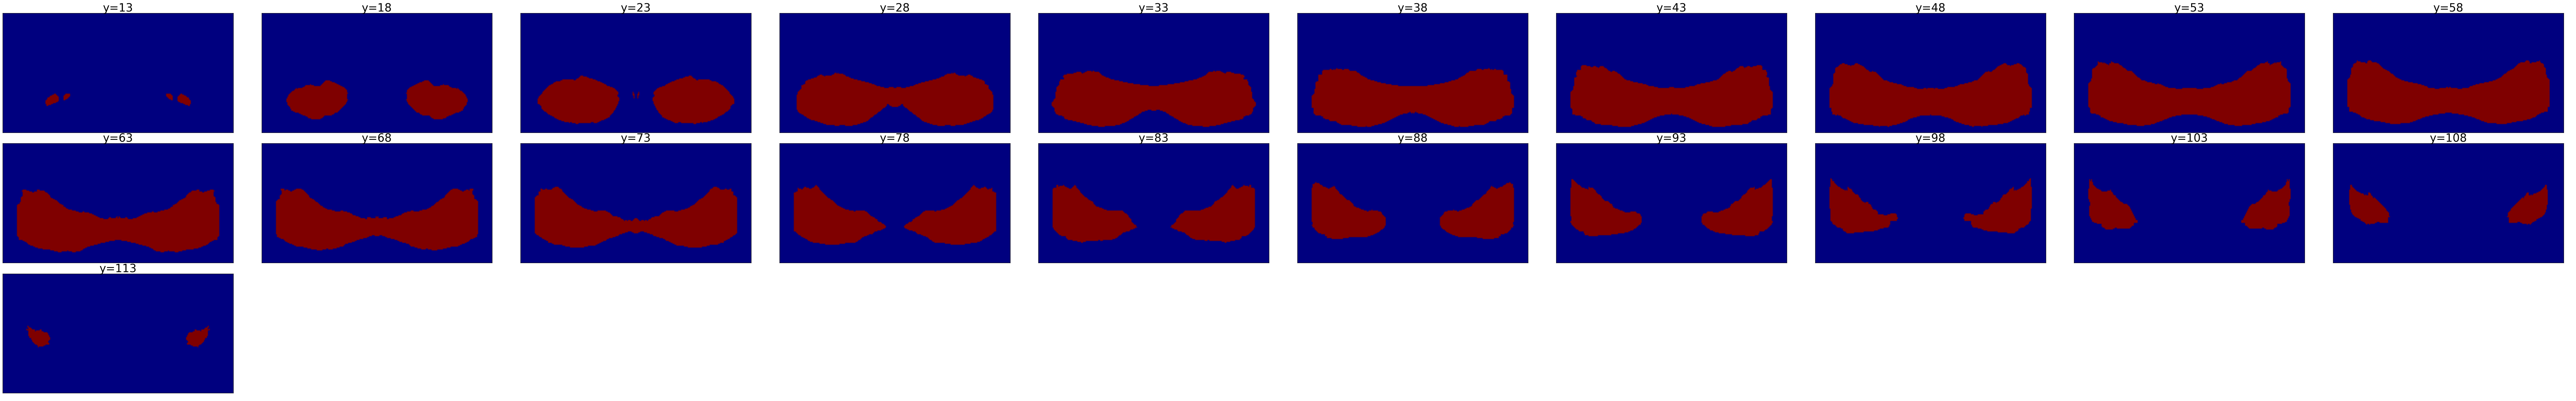

sigma: 1


marching cube: 1.06 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 65701: 1.25 seconds
simplify 1 @ 13141: 1.12 seconds
simplify 2 @ 2629: 0.18 seconds


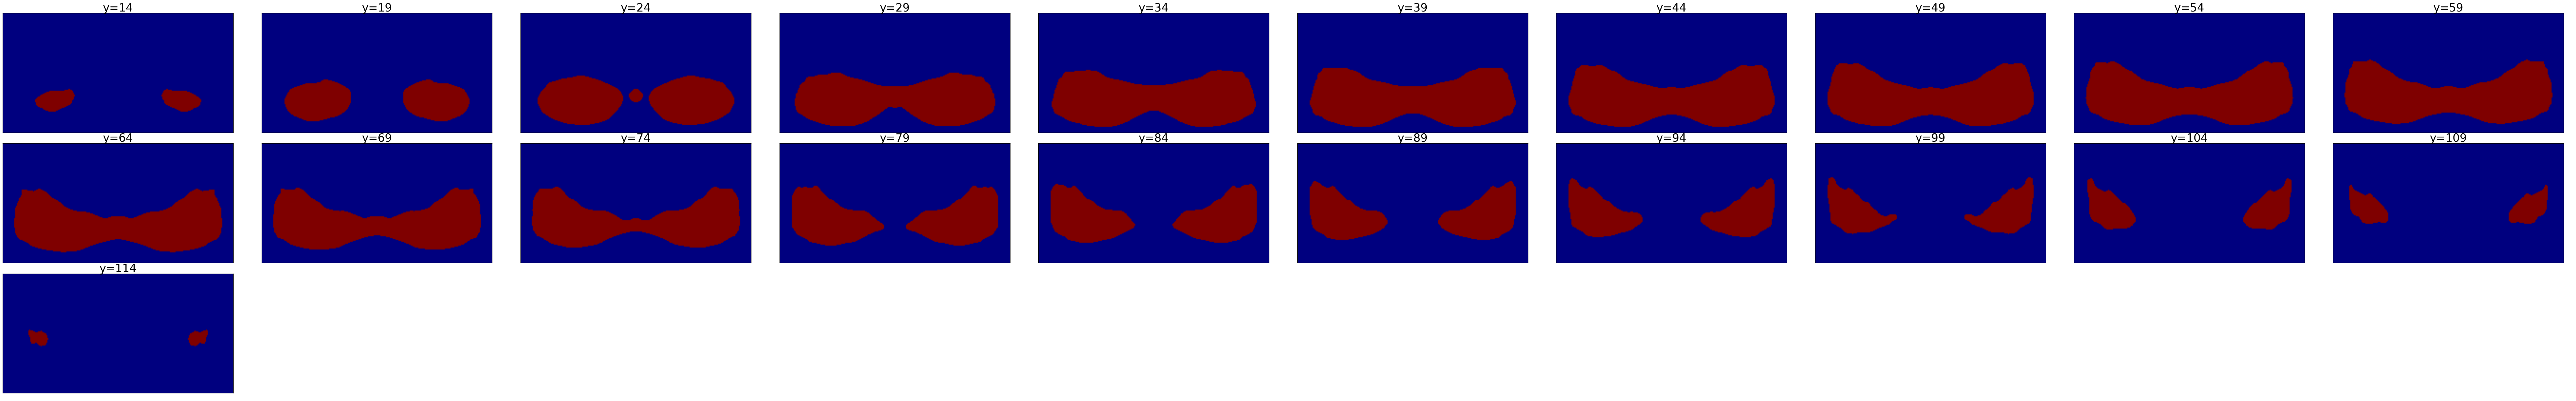

sigma: 2


marching cube: 0.51 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 64445: 0.69 seconds
simplify 1 @ 12890: 0.67 seconds
simplify 2 @ 2579: 0.12 seconds


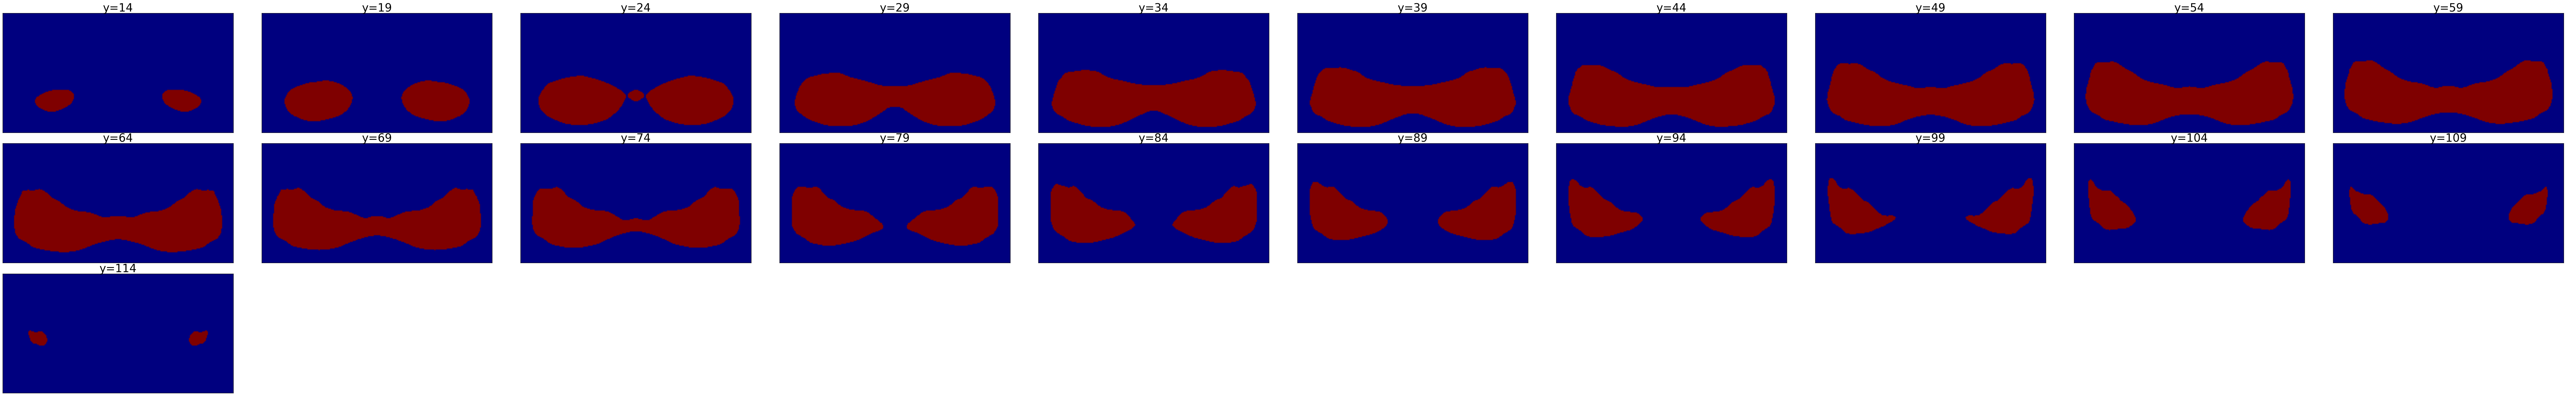

sigma: 3


marching cube: 0.87 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 63444: 1.47 seconds
simplify 1 @ 12690: 1.28 seconds
simplify 2 @ 2539: 0.30 seconds


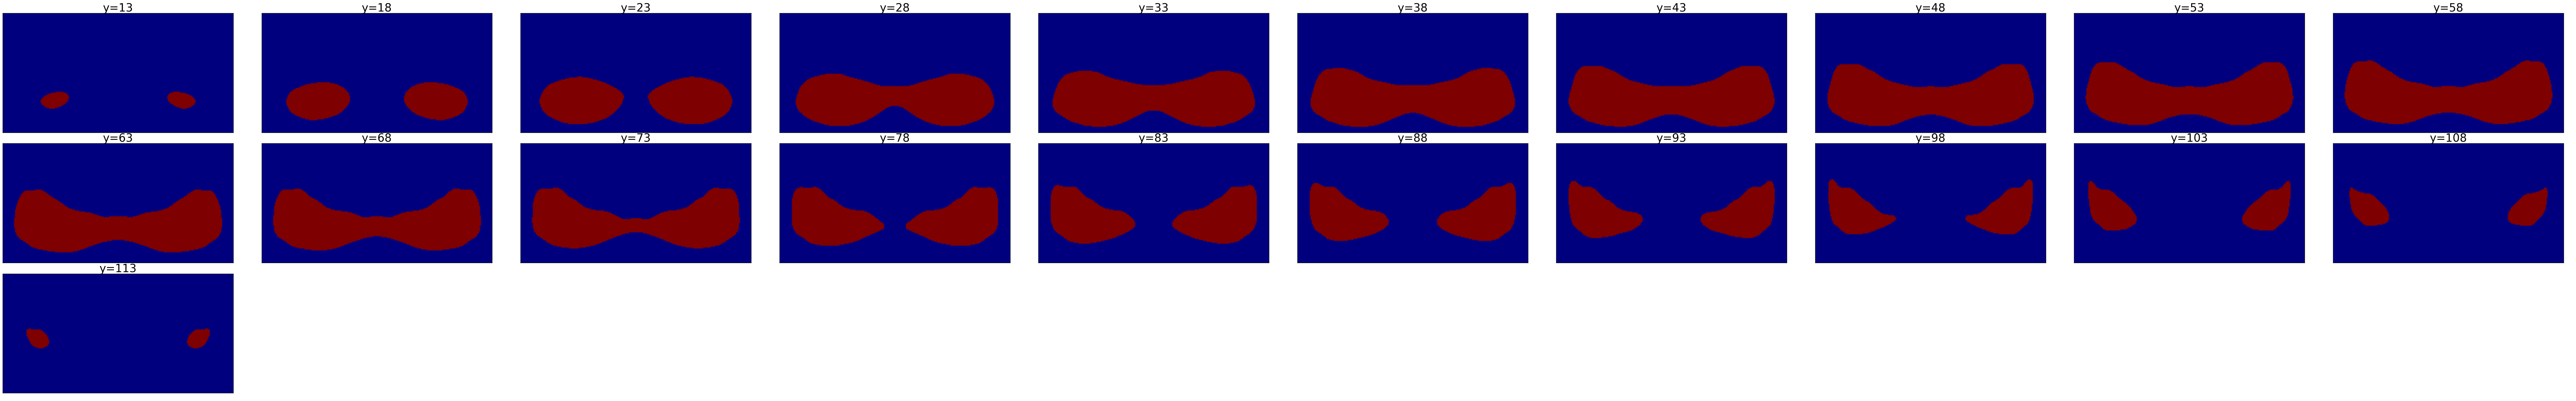

sigma: 5


marching cube: 0.57 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 62120: 0.87 seconds
simplify 1 @ 12425: 1.01 seconds
simplify 2 @ 2486: 0.22 seconds


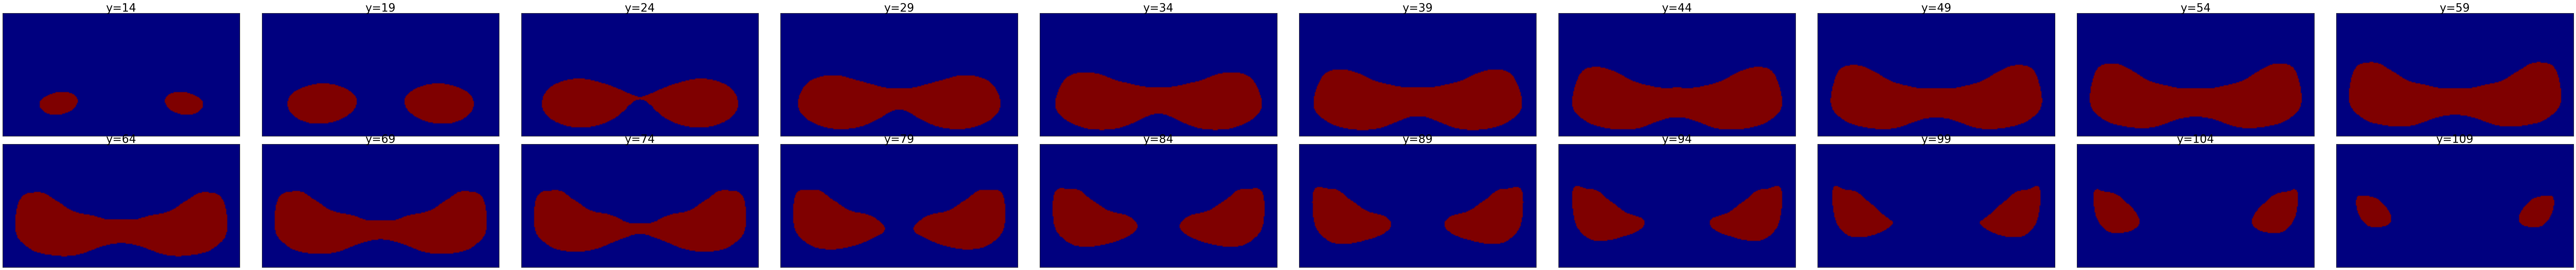

sigma: 10


marching cube: 0.56 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 57906: 0.62 seconds
simplify 1 @ 11582: 0.58 seconds
simplify 2 @ 2318: 0.11 seconds


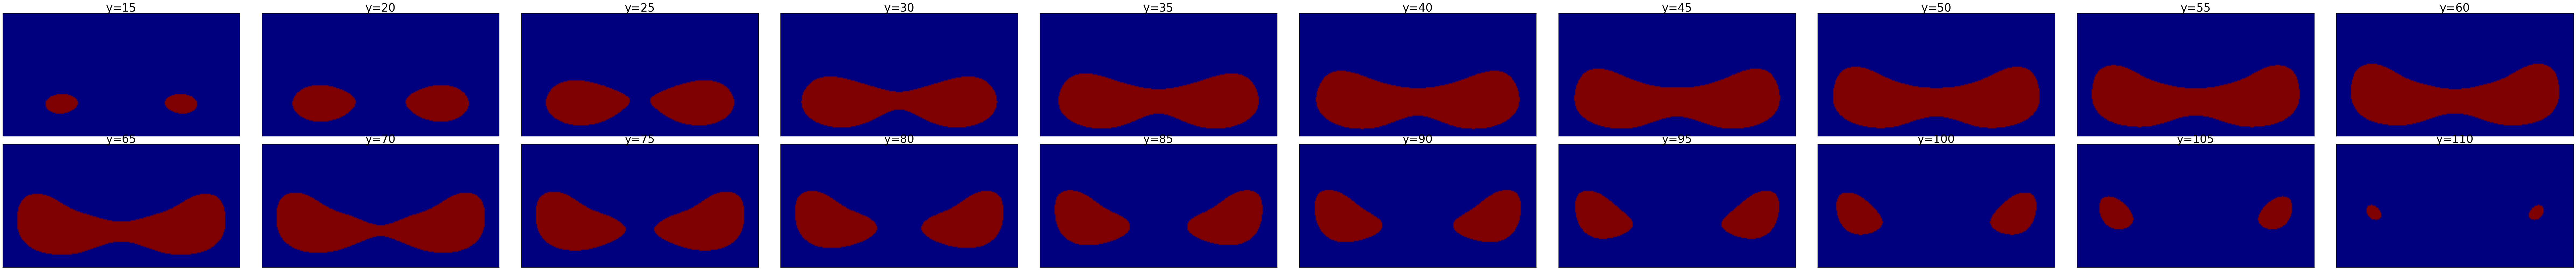

In [194]:
# Effect of the probability-smoothing sigma.

for sigma in [0,1,2,3,5,10]:
    print 'sigma:', sigma
    prob_shape, _, _ = average_shape(polydata_list_allLandmarks['IC'], 
                                                                consensus_percentage=.5,
                                                                num_simplify_iter=3, smooth=True,
                                                               force_symmetric=True, 
                                                                sigma=sigma)
#     display_volume_sections(prob_shape, every=5, ncols=10, direction='x', vmin=0., vmax=1.)
#     display_volume_sections(prob_shape, every=5, ncols=10, direction='y', vmin=0., vmax=1.)
#     display_volume_sections(prob_shape, every=5, ncols=10, direction='z', vmin=0., vmax=1.)
    display_volume_sections(prob_shape > .5, every=5, ncols=10, direction='y', vmin=0., vmax=1., cmap=plt.cm.gray)

# Visualize (1) individual instances (2) aligned instances (3) probabilistic shape (4) thresholded shape.

In [ ]:
instance_colors = [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1)] # assume each structure has at most 6 instances.

for structure in polydata_list_allLandmarks.keys():
# for structure in ['IC']:

    print structure
    
    for direction in ['coronal', 'sagittal', 'horizontal']:

        # Show each instance separately
        for i, polydata in enumerate(polydata_list_allLandmarks[structure]):
            instance_actors = actor_mesh(polydata, instance_colors[i], opacity=1, wireframe=False)

            fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_'+str(i))
            create_parent_dir_if_not_exists(fp)
            launch_vtk([instance_actors], snapshot_fn=fp, interactive=False, init_angle=direction)

        # Show different instances shown aligned together
        instance_actors = [actor_mesh(polydata, instance_colors[i], opacity=1., wireframe=True) 
                           for i, polydata in enumerate(polydata_list_allLandmarks[structure])]

        icp_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_icpAligned')
        launch_vtk(instance_actors, snapshot_fn=icp_fp, interactive=False, init_angle=direction)
#         launch_vtk(instance_actors, init_angle=direction)
        
        # Show voxel-voted probabilistic shape
        prob_shape_actor = actor_volume(prob_shape_allLandmarks[structure].astype(np.float32), 
                                        what='probability', origin=prob_shape_origin_allLandmarks[structure])

        prob_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_probShape')
        launch_vtk([prob_shape_actor], snapshot_fn=prob_shape_fp, interactive=False, init_angle=direction)
#         launch_vtk([prob_shape_actor], init_angle=direction)

        # Show voxel-voted probabilistic shape, thresholded at .5
        actor = actor_mesh(average_polydata_allLandmarks[structure], [1,1,1], opacity=1, wireframe=True)
        
        thresh_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                                structure=structure, suffix=direction+'_thresh0.5')
        launch_vtk([actor], snapshot_fn=thresh_shape_fp, interactive=False, init_angle=direction)
#         launch_vtk([actor], init_angle=direction)

# Compute average position

In [204]:
canonical_locations_rel2canon, canonical_centroid_rel2uncropped, canonical_normal = average_location(centroid_rel2uncropped_allLandmarks)
# canonical locations are with respect to canonical centroid
# canonical centroid is with respect to the aligned uncropped volume of MD589

{'Tz': array([ 734.16418457,  459.67733765,  321.55801392], dtype=float32), 'Sp5O': array([ 847.74951172,  411.51977539,  313.69232178], dtype=float32), '7n': array([ 779.32006836,  407.46792603,  313.0333252 ], dtype=float32), 'DC': array([ 837.7746582 ,  350.5980835 ,  311.01318359], dtype=float32), '5N': array([ 753.85717773,  380.36859131,  312.32876587], dtype=float32), '3N': array([ 689.48278809,  306.58102417,  310.30780029], dtype=float32), 'Pn': array([ 670.92730713,  440.5425415 ,  323.10748291], dtype=float32), '10N': array([ 924.59753418,  415.3248291 ,  306.05123901], dtype=float32), 'VLL': array([ 703.28356934,  386.42913818,  314.19696045], dtype=float32), '7N': array([ 803.71136475,  457.1763916 ,  319.71691895], dtype=float32), 'Amb': array([ 860.38891602,  449.81561279,  316.27822876], dtype=float32), '12N': array([ 916.0322876 ,  423.89572144,  307.41433716], dtype=float32), 'RMC': array([ 665.01873779,  338.23330688,  315.23736572], dtype=float32), 'VCA': array([ 78

In [205]:
print 'deviation angle:', np.rad2deg(np.arccos(canonical_normal[2]))

deviation angle: 5.79126


In [206]:
structure_volumes_rel2canon = {}
structure_meshes_rel2canon = {}

for name_s in canonical_locations_rel2canon.keys():
    
    name_u = convert_to_original_name(name_s)
    
    prob_shape = prob_shape_allLandmarks[name_u]
    prob_shape_origin_rel2structCentroid = prob_shape_origin_rel2structCentroid_allLandmarks[name_u]
    
    vertices_rel2structCentroid, faces = polydata_to_mesh(average_polydata_rel2structCentroid_allLandmarks[name_u])

    structure_centroid_rel2canon = canonical_locations_rel2canon[name_s]
    
    if name_s in singular_structures or parse_label(name_s)[1] == 'R':
        # Singular or Right - don't need mirroring
        structure_volumes_rel2canon[name_s] = (prob_shape, structure_centroid_rel2canon + prob_shape_origin_rel2structCentroid)
        structure_meshes_rel2canon[name_s] = mesh_to_polydata(vertices=vertices_rel2structCentroid + structure_centroid_rel2canon, 
                                                                faces=faces)
    else:
        # Left - need mirroring
        structure_volumes_rel2canon[name_s] = mirror_volume(prob_shape, structure_centroid_rel2canon + prob_shape_origin_rel2structCentroid*(1,1,-1))
        structure_meshes_rel2canon[name_s] = mesh_to_polydata(vertices=vertices_rel2structCentroid*(1,1,-1) + structure_centroid_rel2canon, 
                                                                faces=faces)

# Save atlas structure meshes, prob volumes, and canonical parameters - individual structures in atlas space

In [207]:
# Save atlas structure meshes - averaged for each sided structure, in atlas space

for name_s, mesh in structure_meshes_rel2canon.iteritems():
    fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=name_s)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(mesh, fp)
    upload_to_s3(fp)
    
# Save atlas structure prob. volumes compactly and each volume's origin - one for each sided structure

for name_s, (volume, struct_origin_rel2canon) in structure_volumes_rel2canon.iteritems():
    fp = DataManager.get_prob_shape_volume_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(fp)
    bp.pack_ndarray_file(volume, fp)
    upload_to_s3(fp)
    
    origin_fp = DataManager.get_prob_shape_origin_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(origin_fp)
    np.savetxt(origin_fp, struct_origin_rel2canon)
    upload_to_s3(origin_fp)

# Save canonical locations, centroids, and normal vector.

canon_locs_fp = os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt')
canon_centroid_fp = os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt')
canon_normal_fp = os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt')

write_dict_to_txt(canonical_locations_rel2canon, canon_locs_fp)
np.savetxt(canon_centroid_fp, canonical_centroid_rel2uncropped)
np.savetxt(canon_normal_fp, canonical_normal)

upload_to_s3(canon_locs_fp)
upload_to_s3(canon_centroid_fp)
upload_to_s3(canon_normal_fp)

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_L.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_L.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_L.stl" "s3:

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_R.stl"
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_L.stl" "s3://mou

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Sp5C_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Sp5C_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Sp5C_R_origin.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Sp5C_R_origin.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Pn_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Pn_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Pn_R_origin.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atla

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_RMC_R_origin.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_RMC_R_origin.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_SNC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_SNC_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_SNC_L_origin.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_SNC_L_origin.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_SNC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlas

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_4N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_4N_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_4N_R_origin.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_4N_R_origin.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Tz_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Tz_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_Tz_L_origin.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down

# Generate full-brain atlas VOLUME

In [208]:
ann_vol_xmin_rel2uncropped, ann_vol_xmax_rel2uncropped, \
ann_vol_ymin_rel2uncropped, ann_vol_ymax_rel2uncropped, \
ann_vol_zmin_rel2uncropped, ann_vol_zmax_rel2uncropped = \
DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='annotation', downscale=32)

print 'annotation volume bbox (rel2uncropped):', ann_vol_xmin_rel2uncropped, ann_vol_xmax_rel2uncropped, ann_vol_ymin_rel2uncropped, ann_vol_ymax_rel2uncropped, ann_vol_zmin_rel2uncropped, ann_vol_zmax_rel2uncropped

# This is with respect to the aligned uncropped volume.

annotation volume bbox (rel2uncropped): 622 1042 155 502 128 503


In [209]:
prob_volume_structure_bboxes_rel2ann = {}
for name_s, (volume, origin_rel2canon) in structure_volumes_rel2canon.iteritems():
    ydim, xdim, zdim = volume.shape
    origin_x_rel2ann, origin_y_rel2ann, origin_z_rel2ann = \
    np.round(origin_rel2canon + canonical_centroid_rel2uncropped - (ann_vol_xmin_rel2uncropped, ann_vol_ymin_rel2uncropped, ann_vol_zmin_rel2uncropped)).astype(np.int)
    prob_volume_structure_bboxes_rel2ann[name_s] = (origin_x_rel2ann, origin_x_rel2ann + xdim - 1, 
                                            origin_y_rel2ann, origin_y_rel2ann + ydim - 1, 
                                            origin_z_rel2ann, origin_z_rel2ann + zdim - 1)

In [210]:
# Establish the bounding box for the atlas volume.

bboxes_rel2ann = np.array(prob_volume_structure_bboxes_rel2ann.values())
prob_vol_xmin_rel2ann, prob_vol_ymin_rel2ann, prob_vol_zmin_rel2ann = np.min(bboxes_rel2ann[:, [0,2,4]], axis=0)
prob_vol_xmax_rel2ann, prob_vol_ymax_rel2ann, prob_vol_zmax_rel2ann = np.max(bboxes_rel2ann[:, [1,3,5]], axis=0)
print 'prob volume bbox (rel2ann):', prob_vol_xmin_rel2ann, prob_vol_xmax_rel2ann, prob_vol_ymin_rel2ann, prob_vol_ymax_rel2ann, prob_vol_zmin_rel2ann, prob_vol_zmax_rel2ann

prob_vol_xdim = prob_vol_xmax_rel2ann + 1 - prob_vol_xmin_rel2ann
prob_vol_ydim = prob_vol_ymax_rel2ann + 1 - prob_vol_ymin_rel2ann
prob_vol_zdim = prob_vol_zmax_rel2ann + 1 - prob_vol_zmin_rel2ann

# bbox of atlas volume is relative to MD589 annotation volume.

prob volume bbox (rel2ann): -24 427 -2 364 0 369


In [211]:
# Create proba. volumes, one for each structure, in atlas space.

# Being lazy here: the z axis should be orthogonal to the canonical normal, but here I assume z axis is the original

atlas_prob_volume_allLandmarks = {}

for name_s, (volume, structure_origin_rel2canon) in structure_volumes_rel2canon.iteritems():
    
    structure_ydim, structure_xdim, structure_zdim = volume.shape
    
    structure_origin_x_rel2atlas, structure_origin_y_rel2atlas, structure_origin_z_rel2atlas = \
    np.round(structure_origin_rel2canon + canonical_centroid_rel2uncropped - \
            (ann_vol_xmin_rel2uncropped, ann_vol_ymin_rel2uncropped, ann_vol_zmin_rel2uncropped) - \
            (prob_vol_xmin_rel2ann, prob_vol_ymin_rel2ann, prob_vol_zmin_rel2ann)).astype(np.int)
        
    atlas_prob_volume = np.zeros((prob_vol_ydim, prob_vol_xdim, prob_vol_zdim), np.float16)

    atlas_prob_volume[structure_origin_y_rel2atlas : structure_origin_y_rel2atlas + structure_ydim, 
                      structure_origin_x_rel2atlas : structure_origin_x_rel2atlas + structure_xdim, 
                      structure_origin_z_rel2atlas : structure_origin_z_rel2atlas + structure_zdim] = volume
    
    atlas_prob_volume_allLandmarks[name_s] = atlas_prob_volume

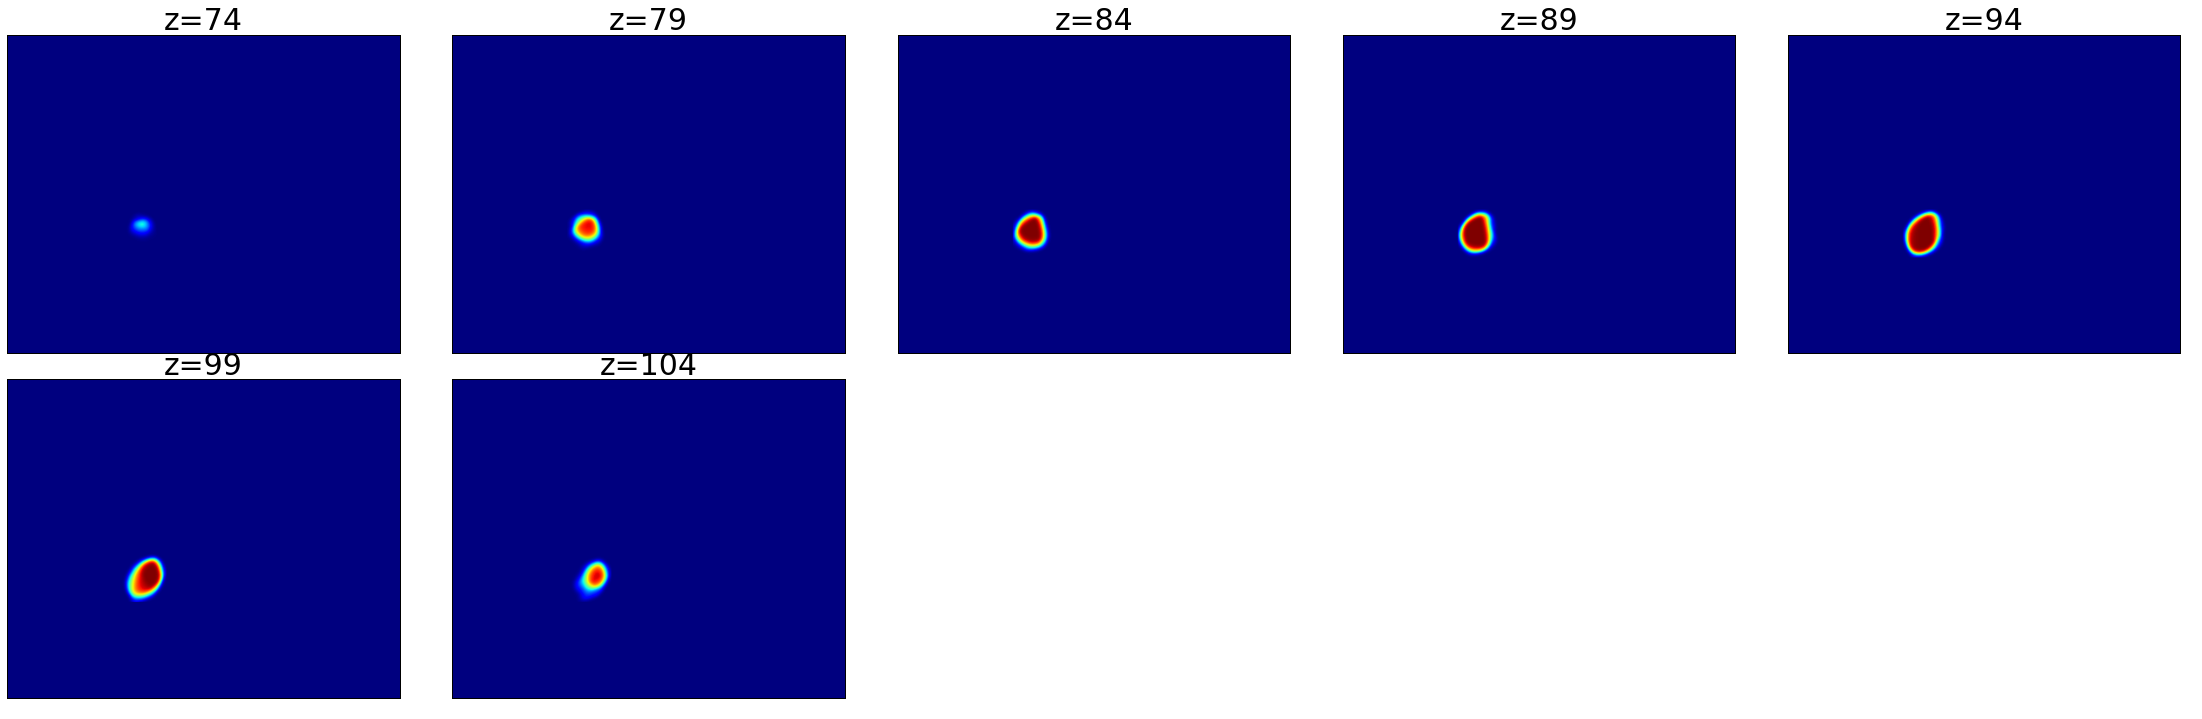

In [212]:
display_volume_sections(atlas_prob_volume_allLandmarks['5N_L'], every=5, vmin=0, vmax=1)

In [30]:
# Check if volume and mesh match.

In [214]:
all_atlas_structure_volume_actors_rel2canon = [
    actor_volume(vol.astype(np.float32), what='probability', 
                                          origin= - canonical_centroid_rel2uncropped + \
                 (ann_vol_xmin_rel2uncropped, ann_vol_ymin_rel2uncropped, ann_vol_zmin_rel2uncropped) + \
                 (prob_vol_xmin_rel2ann, prob_vol_ymin_rel2ann, prob_vol_zmin_rel2ann),
                                          c=(1,1,1))
    for name_s, vol in atlas_prob_volume_allLandmarks.iteritems() if name_s == '5N_L']

In [215]:
all_atlas_structure_mesh_actors_rel2canon = [actor_mesh(polydata, 
                                              np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.,
                                             wireframe=False) 
                                   for name_s, polydata in structure_meshes_rel2canon.iteritems()
                                             if name_s == '5N_L']

In [216]:
launch_vtk(all_atlas_structure_volume_actors_rel2canon + all_atlas_structure_mesh_actors_rel2canon, init_angle='sagittal')

In [ ]:
# End

In [217]:
prob_vol_xmin_rel2uncropped = prob_vol_xmin_rel2ann + ann_vol_xmin_rel2uncropped
prob_vol_xmax_rel2uncropped = prob_vol_xmax_rel2ann + ann_vol_xmin_rel2uncropped
prob_vol_ymin_rel2uncropped = prob_vol_ymin_rel2ann + ann_vol_ymin_rel2uncropped
prob_vol_ymax_rel2uncropped = prob_vol_ymax_rel2ann + ann_vol_ymin_rel2uncropped
prob_vol_zmin_rel2uncropped = prob_vol_zmin_rel2ann + ann_vol_zmin_rel2uncropped
prob_vol_zmax_rel2uncropped = prob_vol_zmax_rel2ann + ann_vol_zmin_rel2uncropped

In [218]:
# Save full-brain atlas volumes.

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, structure=name_s)
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(vol, vol_fp)
    upload_to_s3(vol_fp)
    
    # Save atlas score volume bbox txt.
    fp = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, structure=name_s)
    np.savetxt(fp, np.array([prob_vol_xmin_rel2uncropped, prob_vol_xmax_rel2uncropped, 
                             prob_vol_ymin_rel2uncropped, prob_vol_ymax_rel2uncropped, 
                             prob_vol_zmin_rel2uncropped, prob_vol_zmax_rel2uncropped])[None,:], fmt='%d')
    upload_to_s3(fp)
    # This is wrt aligned uncropped volume

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_s

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_12N_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_12N_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_s

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCP_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCP_L_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L_bbox.txt"


# Consider Surround

In [221]:
# Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

valid_level = .5

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
print "surround size (in voxels):", surround_distance_voxel

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    
    surround_vol = get_surround_volume(vol, valid_level=valid_level, distance=surround_distance_voxel, prob=True)
    
    vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, 
                                             structure=convert_to_surround_name(name_s, margin=surround_distance_um))
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(surround_vol, vol_fp)
    upload_to_s3(vol_fp)
    
    # Save surround score volume bbox txt.
    # This is wrt MD589 annotation volume
    fn = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, 
                                              structure=convert_to_surround_name(name_s, margin=surround_distance_um))
    np.savetxt(fn, np.array([prob_vol_xmin_rel2ann, prob_vol_xmax_rel2ann,
                             prob_vol_ymin_rel2ann, prob_vol_ymax_rel2ann, 
                             prob_vol_zmin_rel2ann, prob_vol_zmax_rel2ann])[None,:], fmt='%d')
    upload_to_s3(fn)

surround size (in voxels): 13.5869565217
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_R_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_L_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_L_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_12N_surround_200.bp" "s3://mouse

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_RMC_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_RMC_L_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_3N_R_surround_200.bp" "s3://mo

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_L_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_L_surround_200.bp" "s3://mousebrainat

In [52]:
# Convert surround volumes to meshes, for visualization.

for name_s in all_known_structures_sided:
# for name_s in ['IC']:
    
    try:
        
        surr_name = convert_to_surround_name(name_s, margin=surround_distance_um)

        surround_vol = DataManager.load_original_volume(stack=atlas_name, structure=surr_name, downscale=32)
        
        if name_s in singular_structures:
            surround_vol = symmetricalize_volume(surround_vol)
        
        xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(surround_vol > 0)

        polydata = volume_to_polydata(surround_vol[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1], 
                                      origin=(xmin+prob_vol_xmin+ann_vol_xmin-canonical_centroid[0], 
                                           ymin+prob_vol_ymin+ann_vol_ymin-canonical_centroid[1], 
                                           zmin+prob_vol_zmin+ann_vol_zmin-canonical_centroid[2]), 
                           num_simplify_iter=3, smooth=True)
        
        # centered at "canonical centroid" - same as interior volumes
        
        mesh_fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=surr_name)
        save_mesh(polydata, mesh_fp)
        upload_to_s3(mesh_fp)
    
    except Exception as e:
        sys.stderr.write('Error generating mesh for %s : %s\n' % (surr_name, str(e)))        

marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23188: 0.19 seconds
simplify 1 @ 4640: 0.19 seconds
simplify 2 @ 931: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_L_surround_200.stl


Child returned 0
9.89 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23168: 0.20 seconds
simplify 1 @ 4636: 0.19 seconds
simplify 2 @ 930: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_R_surround_200.stl


Child returned 0
6.03 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6417: 0.05 seconds
simplify 1 @ 1286: 0.04 seconds
simplify 2 @ 260: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_L_surround_200.stl


Child returned 0
3.62 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6402: 0.05 seconds
simplify 1 @ 1283: 0.04 seconds
simplify 2 @ 259: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_R_surround_200.stl


Child returned 0
3.82 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34130: 0.31 seconds
simplify 1 @ 6829: 0.37 seconds
simplify 2 @ 1369: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_L_surround_200.stl


Child returned 0
2.95 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34176: 0.29 seconds
simplify 1 @ 6838: 0.29 seconds
simplify 2 @ 1370: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_R_surround_200.stl


Child returned 0
12.65 seconds.
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35190: 0.25 seconds
simplify 1 @ 7041: 0.30 seconds
simplify 2 @ 1411: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_L_surround_200.stl


Child returned 0
8.98 seconds.
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35250: 0.25 seconds
simplify 1 @ 7053: 0.30 seconds
simplify 2 @ 1413: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_R_surround_200.stl


Child returned 0
6.92 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7229: 0.06 seconds
simplify 1 @ 1449: 0.05 seconds
simplify 2 @ 293: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_L_surround_200.stl


Child returned 0
3.66 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7247: 0.06 seconds
simplify 1 @ 1452: 0.05 seconds
simplify 2 @ 293: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_R_surround_200.stl


Child returned 0
4.12 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16116: 0.15 seconds
simplify 1 @ 3226: 0.13 seconds
simplify 2 @ 648: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_L_surround_200.stl


Child returned 0
5.44 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16129: 0.17 seconds
simplify 1 @ 3229: 0.14 seconds
simplify 2 @ 649: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_R_surround_200.stl


Child returned 0
5.73 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31951: 0.25 seconds
simplify 1 @ 6393: 0.27 seconds
simplify 2 @ 1281: 0.05 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_L_surround_200.stl


Child returned 0
10.04 seconds.
marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31989: 0.27 seconds
simplify 1 @ 6401: 0.28 seconds
simplify 2 @ 1283: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_R_surround_200.stl


Child returned 0
8.05 seconds.
marching cube: 0.09 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 45485: 0.40 seconds
simplify 1 @ 9100: 0.41 seconds
simplify 2 @ 1823: 0.08 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_L_surround_200.stl


Child returned 0
12.84 seconds.
marching cube: 0.10 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 45418: 0.42 seconds
simplify 1 @ 9086: 0.43 seconds
simplify 2 @ 1820: 0.08 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_R_surround_200.stl


Child returned 0
8.95 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19242: 0.16 seconds
simplify 1 @ 3852: 0.14 seconds
simplify 2 @ 773: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_L_surround_200.stl


Child returned 0
6.19 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19227: 0.16 seconds
simplify 1 @ 3848: 0.15 seconds
simplify 2 @ 772: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_R_surround_200.stl


Child returned 0
5.62 seconds.
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 39238: 0.31 seconds
simplify 1 @ 7850: 0.35 seconds
simplify 2 @ 1573: 0.07 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_L_surround_200.stl


Child returned 0
13.82 seconds.
marching cube: 0.13 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39220: 0.34 seconds
simplify 1 @ 7847: 0.37 seconds
simplify 2 @ 1572: 0.07 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_R_surround_200.stl


Child returned 0
8.34 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20512: 0.16 seconds
simplify 1 @ 4105: 0.17 seconds
simplify 2 @ 824: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_L_surround_200.stl


Child returned 0
4.82 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20485: 0.16 seconds
simplify 1 @ 4100: 0.16 seconds
simplify 2 @ 823: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_R_surround_200.stl


Child returned 0
9.16 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24112: 0.17 seconds
simplify 1 @ 4825: 0.20 seconds
simplify 2 @ 968: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_L_surround_200.stl


Child returned 0
6.97 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24076: 0.18 seconds
simplify 1 @ 4818: 0.20 seconds
simplify 2 @ 966: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_R_surround_200.stl


Child returned 0
7.28 seconds.
marching cube: 0.17 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 71254: 0.56 seconds
simplify 1 @ 14254: 0.68 seconds
simplify 2 @ 2854: 0.14 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_L_surround_200.stl


Child returned 0
10.56 seconds.
marching cube: 0.18 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 71103: 0.60 seconds
simplify 1 @ 14223: 0.69 seconds
simplify 2 @ 2847: 0.14 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_R_surround_200.stl


Child returned 0
13.97 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11921: 0.10 seconds
simplify 1 @ 2387: 0.09 seconds
simplify 2 @ 480: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_L_surround_200.stl


Child returned 0
4.42 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11947: 0.10 seconds
simplify 1 @ 2392: 0.09 seconds
simplify 2 @ 481: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_R_surround_200.stl


Child returned 0
3.04 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5126: 0.04 seconds
simplify 1 @ 1028: 0.03 seconds
simplify 2 @ 208: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_L_surround_200.stl


Child returned 0
1.01 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5143: 0.04 seconds
simplify 1 @ 1031: 0.03 seconds
simplify 2 @ 209: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_R_surround_200.stl


Child returned 0
0.62 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28545: 0.30 seconds
simplify 1 @ 5712: 0.24 seconds
simplify 2 @ 1145: 0.05 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_L_surround_200.stl


Child returned 0
1.11 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28569: 0.31 seconds
simplify 1 @ 5717: 0.26 seconds
simplify 2 @ 1146: 0.05 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_R_surround_200.stl


Child returned 0
1.13 seconds.
marching cube: 0.09 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35153: 0.42 seconds
simplify 1 @ 7033: 0.27 seconds
simplify 2 @ 1409: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_L_surround_200.stl


Child returned 0
1.20 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35113: 0.43 seconds
simplify 1 @ 7025: 0.31 seconds
simplify 2 @ 1408: 0.07 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_R_surround_200.stl


Child returned 0
1.22 seconds.
marching cube: 0.18 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 70083: 0.64 seconds
simplify 1 @ 14019: 0.71 seconds
simplify 2 @ 2807: 0.13 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_L_surround_200.stl


Child returned 0
1.98 seconds.
marching cube: 0.17 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 69921: 0.61 seconds
simplify 1 @ 13987: 0.67 seconds
simplify 2 @ 2800: 0.13 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_R_surround_200.stl


Child returned 0
1.91 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11087: 0.08 seconds
simplify 1 @ 2220: 0.08 seconds
simplify 2 @ 447: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_L_surround_200.stl


Child returned 0
0.80 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11088: 0.08 seconds
simplify 1 @ 2220: 0.07 seconds
simplify 2 @ 447: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_R_surround_200.stl


Child returned 0
0.77 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16002: 0.13 seconds
simplify 1 @ 3203: 0.12 seconds
simplify 2 @ 643: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_L_surround_200.stl


Child returned 0
0.83 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15989: 0.13 seconds
simplify 1 @ 3201: 0.14 seconds
simplify 2 @ 643: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_R_surround_200.stl


Child returned 0
3.18 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33457: 0.31 seconds
simplify 1 @ 6694: 0.29 seconds
simplify 2 @ 1342: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_L_surround_200.stl


Child returned 0
2.32 seconds.
marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33469: 0.32 seconds
simplify 1 @ 6697: 0.31 seconds
simplify 2 @ 1342: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_R_surround_200.stl


Child returned 0
2.28 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 22948: 0.18 seconds
simplify 1 @ 4592: 0.18 seconds
simplify 2 @ 921: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_L_surround_200.stl


Child returned 0
1.01 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22939: 0.20 seconds
simplify 1 @ 4591: 0.20 seconds
simplify 2 @ 921: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_R_surround_200.stl


Child returned 0
1.03 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35057: 0.29 seconds
simplify 1 @ 7014: 0.34 seconds
simplify 2 @ 1406: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_L_surround_200.stl


Child returned 0
1.28 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34955: 0.28 seconds
simplify 1 @ 6994: 0.27 seconds
simplify 2 @ 1402: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_R_surround_200.stl


Child returned 0
1.20 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12855: 0.11 seconds
simplify 1 @ 2574: 0.10 seconds
simplify 2 @ 518: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_AP_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_AP_surround_200.stl


Child returned 0
0.83 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 36427: 0.33 seconds
simplify 1 @ 7288: 0.32 seconds
simplify 2 @ 1460: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_12N_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_12N_surround_200.stl


Child returned 0
1.38 seconds.
marching cube: 0.19 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 62141: 0.76 seconds
simplify 1 @ 12431: 0.68 seconds
simplify 2 @ 2489: 0.14 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RtTg_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RtTg_surround_200.stl


Child returned 0
1.91 seconds.
Child returned 0


rm -rf /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp && mkdir -p /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp


Child returned 1
0.67 seconds.
File does not exist: /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp
Error generating mesh for sp5_surround_200 : [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp'
Child returned 0


rm -rf /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp && mkdir -p /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp


Child returned 1
0.80 seconds.
File does not exist: /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp
Error generating mesh for outerContour_surround_200 : [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp'
marching cube: 0.85 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 222517: 2.51 seconds
simplify 1 @ 44506: 2.57 seconds
simplify 2 @ 8904: 0.53 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SC_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SC_surround_200.stl


Child returned 0
5.07 seconds.
marching cube: 0.38 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 162219: 1.63 seconds
simplify 1 @ 32447: 1.77 seconds
simplify 2 @ 6492: 0.38 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_IC_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_IC_surround_200.stl


Child returned 0
3.80 seconds.


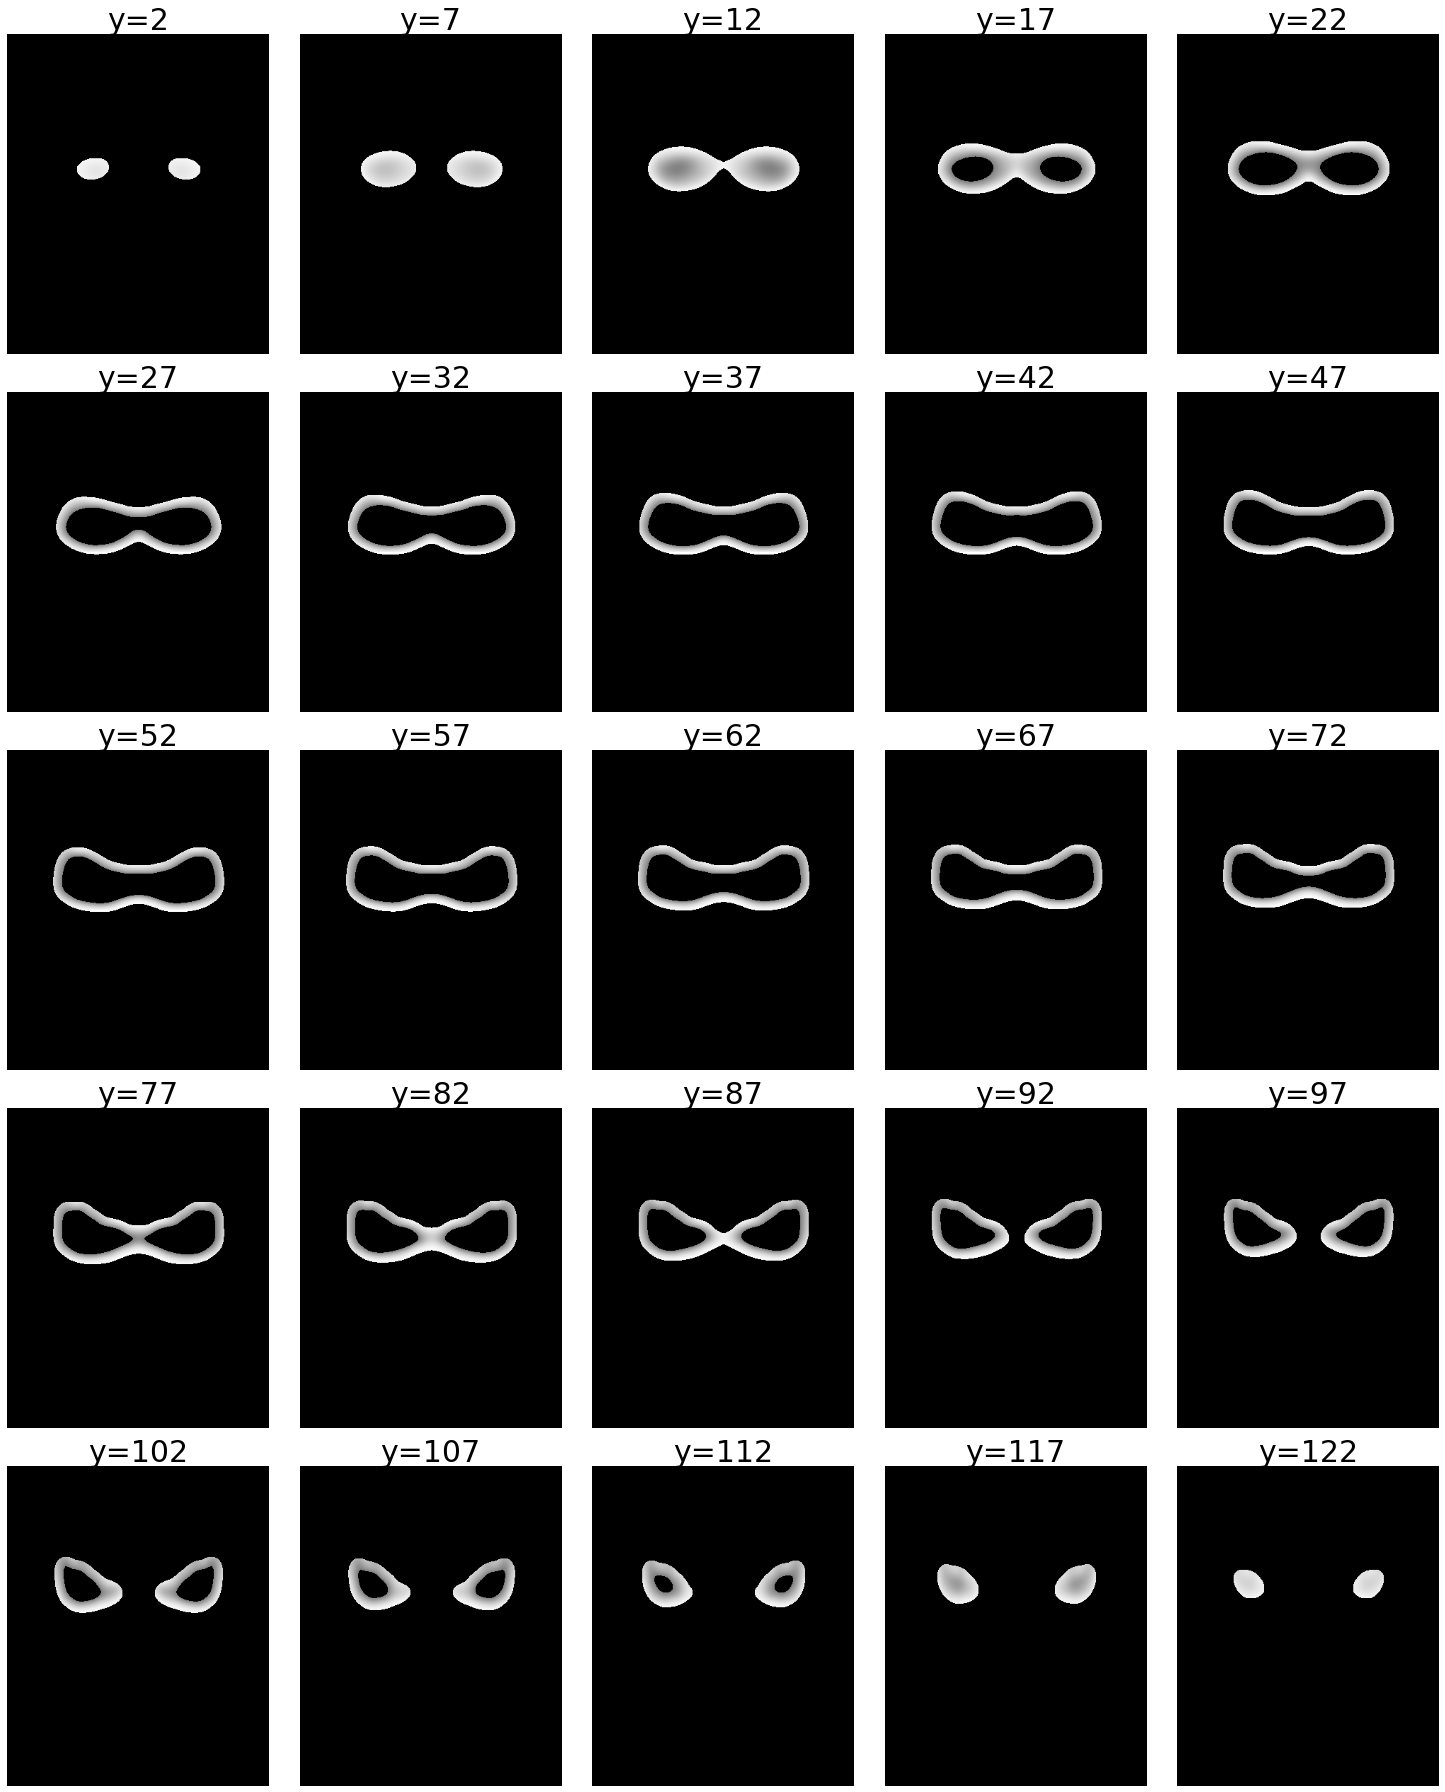

In [222]:
surround_vol = get_surround_volume(atlas_prob_volume_allLandmarks['IC'], distance=13, valid_level=0.5, prob=True)
display_volume_sections(surround_vol, direction='y', vmin=0, vmax=1., cmap=plt.cm.gray)

# Load Atlas

In [223]:
atlas_name = 'atlasV5'

# Load and display meshes

In [224]:
# Load canonical info

canonical_locations_rel2canon = read_dict_from_txt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'), 
                                         key_converter=str)
canonical_centroid_rel2uncropped = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'))
canonical_normal = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'))

In [225]:
# Load atlas meshes

# Meshes are wrt. 

structure_meshes_rel2canon = DataManager.load_meshes(stack_m=atlas_name, sided=True, include_surround=False)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_sp5.stl
Error loading mesh for sp5: Mesh is empty: sp5..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_outerContour.stl
Error loading mesh for outerContour: Mesh is empty: outerContour..


In [226]:
# Load atlas meshes, including surrounding

atlas_space_structure_meshes_surround_included = DataManager.load_meshes(stack_m=atlas_name, sided=True, include_surround=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_L_surround_200.stl
Error loading mesh for 10N_L_surround_200: Mesh is empty: 10N_L_surround_200..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_R_surround_200.stl
Error loading mesh for 10N_R_surround_200: Mesh is empty: 10N_R_surround_200..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_surround_200.stl
Error loading mesh for 12N_surround_200: Mesh is empty: 12N_surround_200..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_L_surround_200.stl
Error loading mesh for 3N_L_surround_200: Mesh is empty: 3N_L_surround_200..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down3

In [227]:
# Load shell

stack_fixed = 'MD589'
shell_polydata = DataManager.load_shell_mesh(stack=stack_fixed, downscale=32)

In [228]:
# structure_sided_to_color = {n: np.random.randint(0, 255, (3,)) for n in all_known_structures_sided}
# structure_to_color = {n: np.random.randint(0, 255, (3,)) for n in all_known_structures}

# Load probabilistic volumes for one specific structure.

In [96]:
structure_volumes = DataManager.load_prob_shapes(stack_m=atlas_name, trial_idx=None, sided=True)

rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_sp5.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_sp5.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_sp5.bp"


Error loading probablistic shape for sp5: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_sp5.bp'


rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_outerContour.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_outerContour.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_outerContour.bp"


Error loading probablistic shape for outerContour: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/probabilistic_shapes/atlasV5_down32_scoreVolume_outerContour.bp'


In [88]:
# Interactively visualize a structure as prob. volume.

prob_vol, origin = structure_volumes['IC']

prob_vol_thresh = prob_vol >= .5
prob_vol_thresholded_polydata = volume_to_polydata(prob_vol_thresh, origin, num_simplify_iter=3, smooth=True)
launch_vtk([actor_mesh(prob_vol_thresholded_polydata, color=(1,1,1), wireframe=False)], init_angle='coronal')

marching cube: 1.03 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 64738: 0.90 seconds
simplify 1 @ 12949: 0.81 seconds
simplify 2 @ 2591: 0.15 seconds


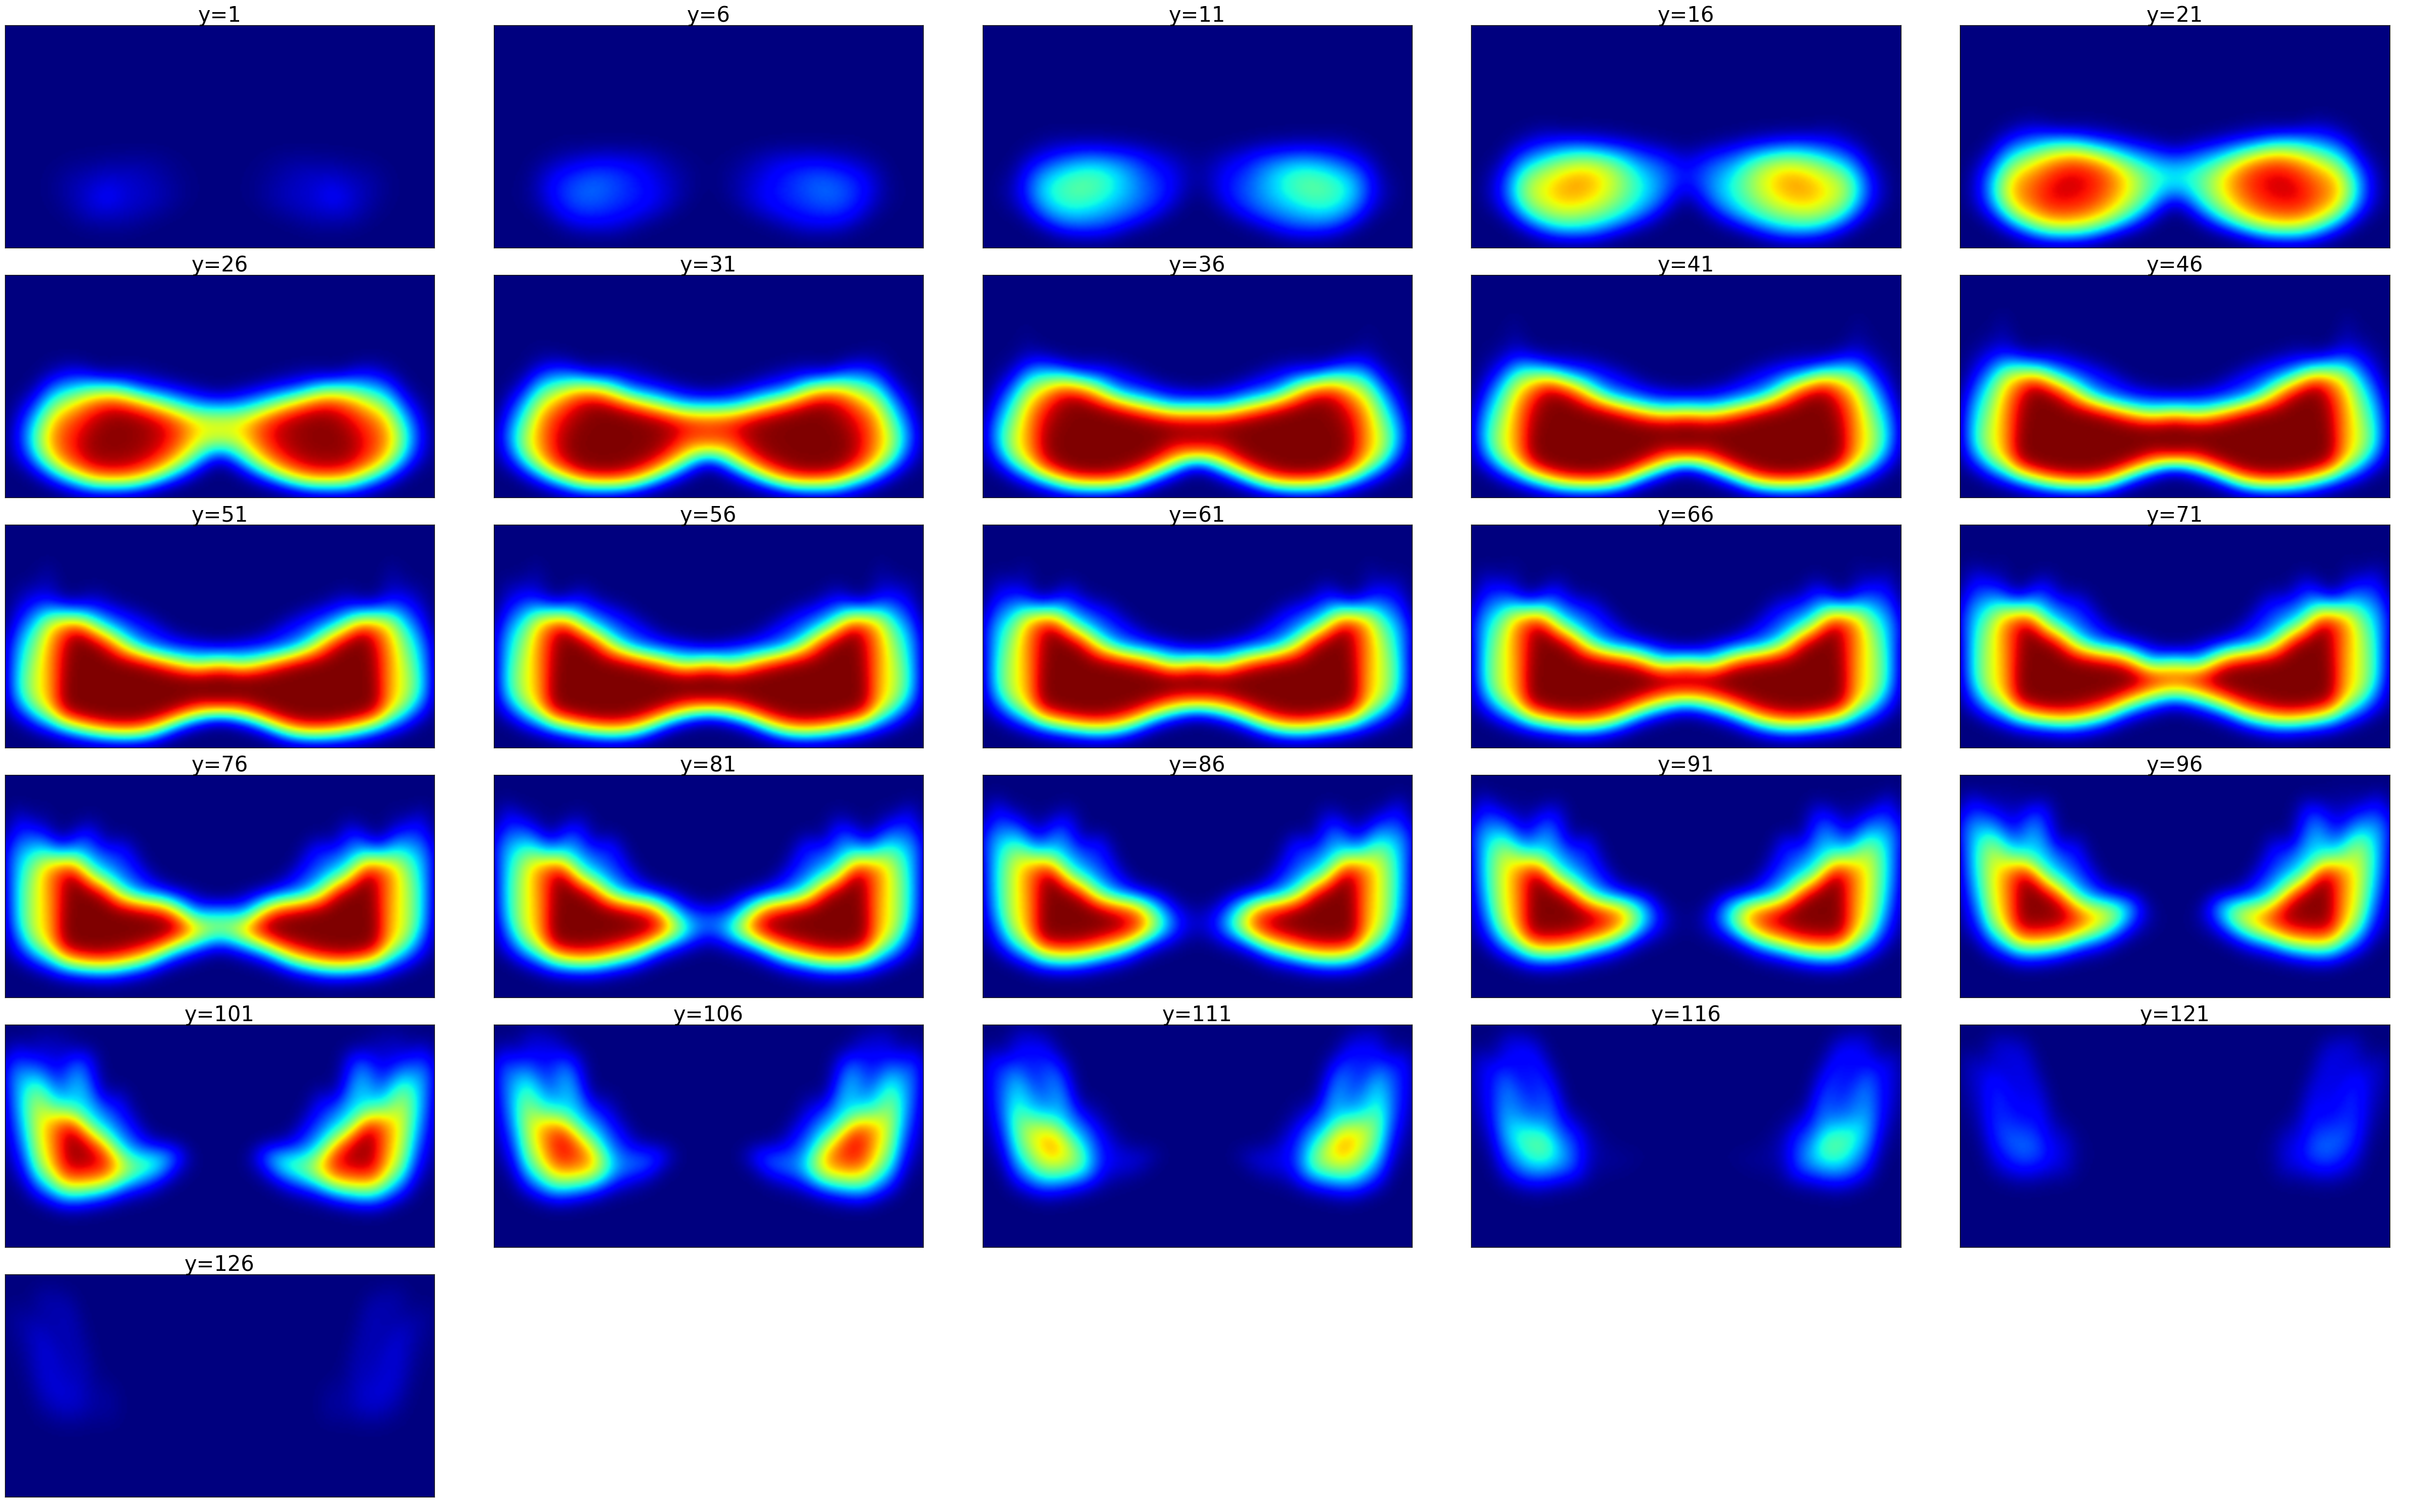

In [270]:
# for level in np.arange(.5, 1, .1):
#     display_volume_sections(prob_vol >= level, every=5, vmin=0, vmax=1, cmap=plt.cm.gray, direction='y')

display_volume_sections(structure_volumes['IC'][0], every=5, vmin=0, vmax=1, direction='y')

# Load whole atlas-space volumes

In [229]:
atlas_volume, structure_to_label, label_to_structure = \
DataManager.load_original_volume_all_known_structures(stack=atlas_name, sided=True)

Prior structure/index map not found. Generating a new one.


rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour.bp"


File does not exist: /home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour.bp
Score volume for outerContour does not exist: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour.bp'


rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5.bp"


File does not exist: /home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5.bp
Score volume for sp5 does not exist: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5.bp'
Volume shape: (367, 452, 370)


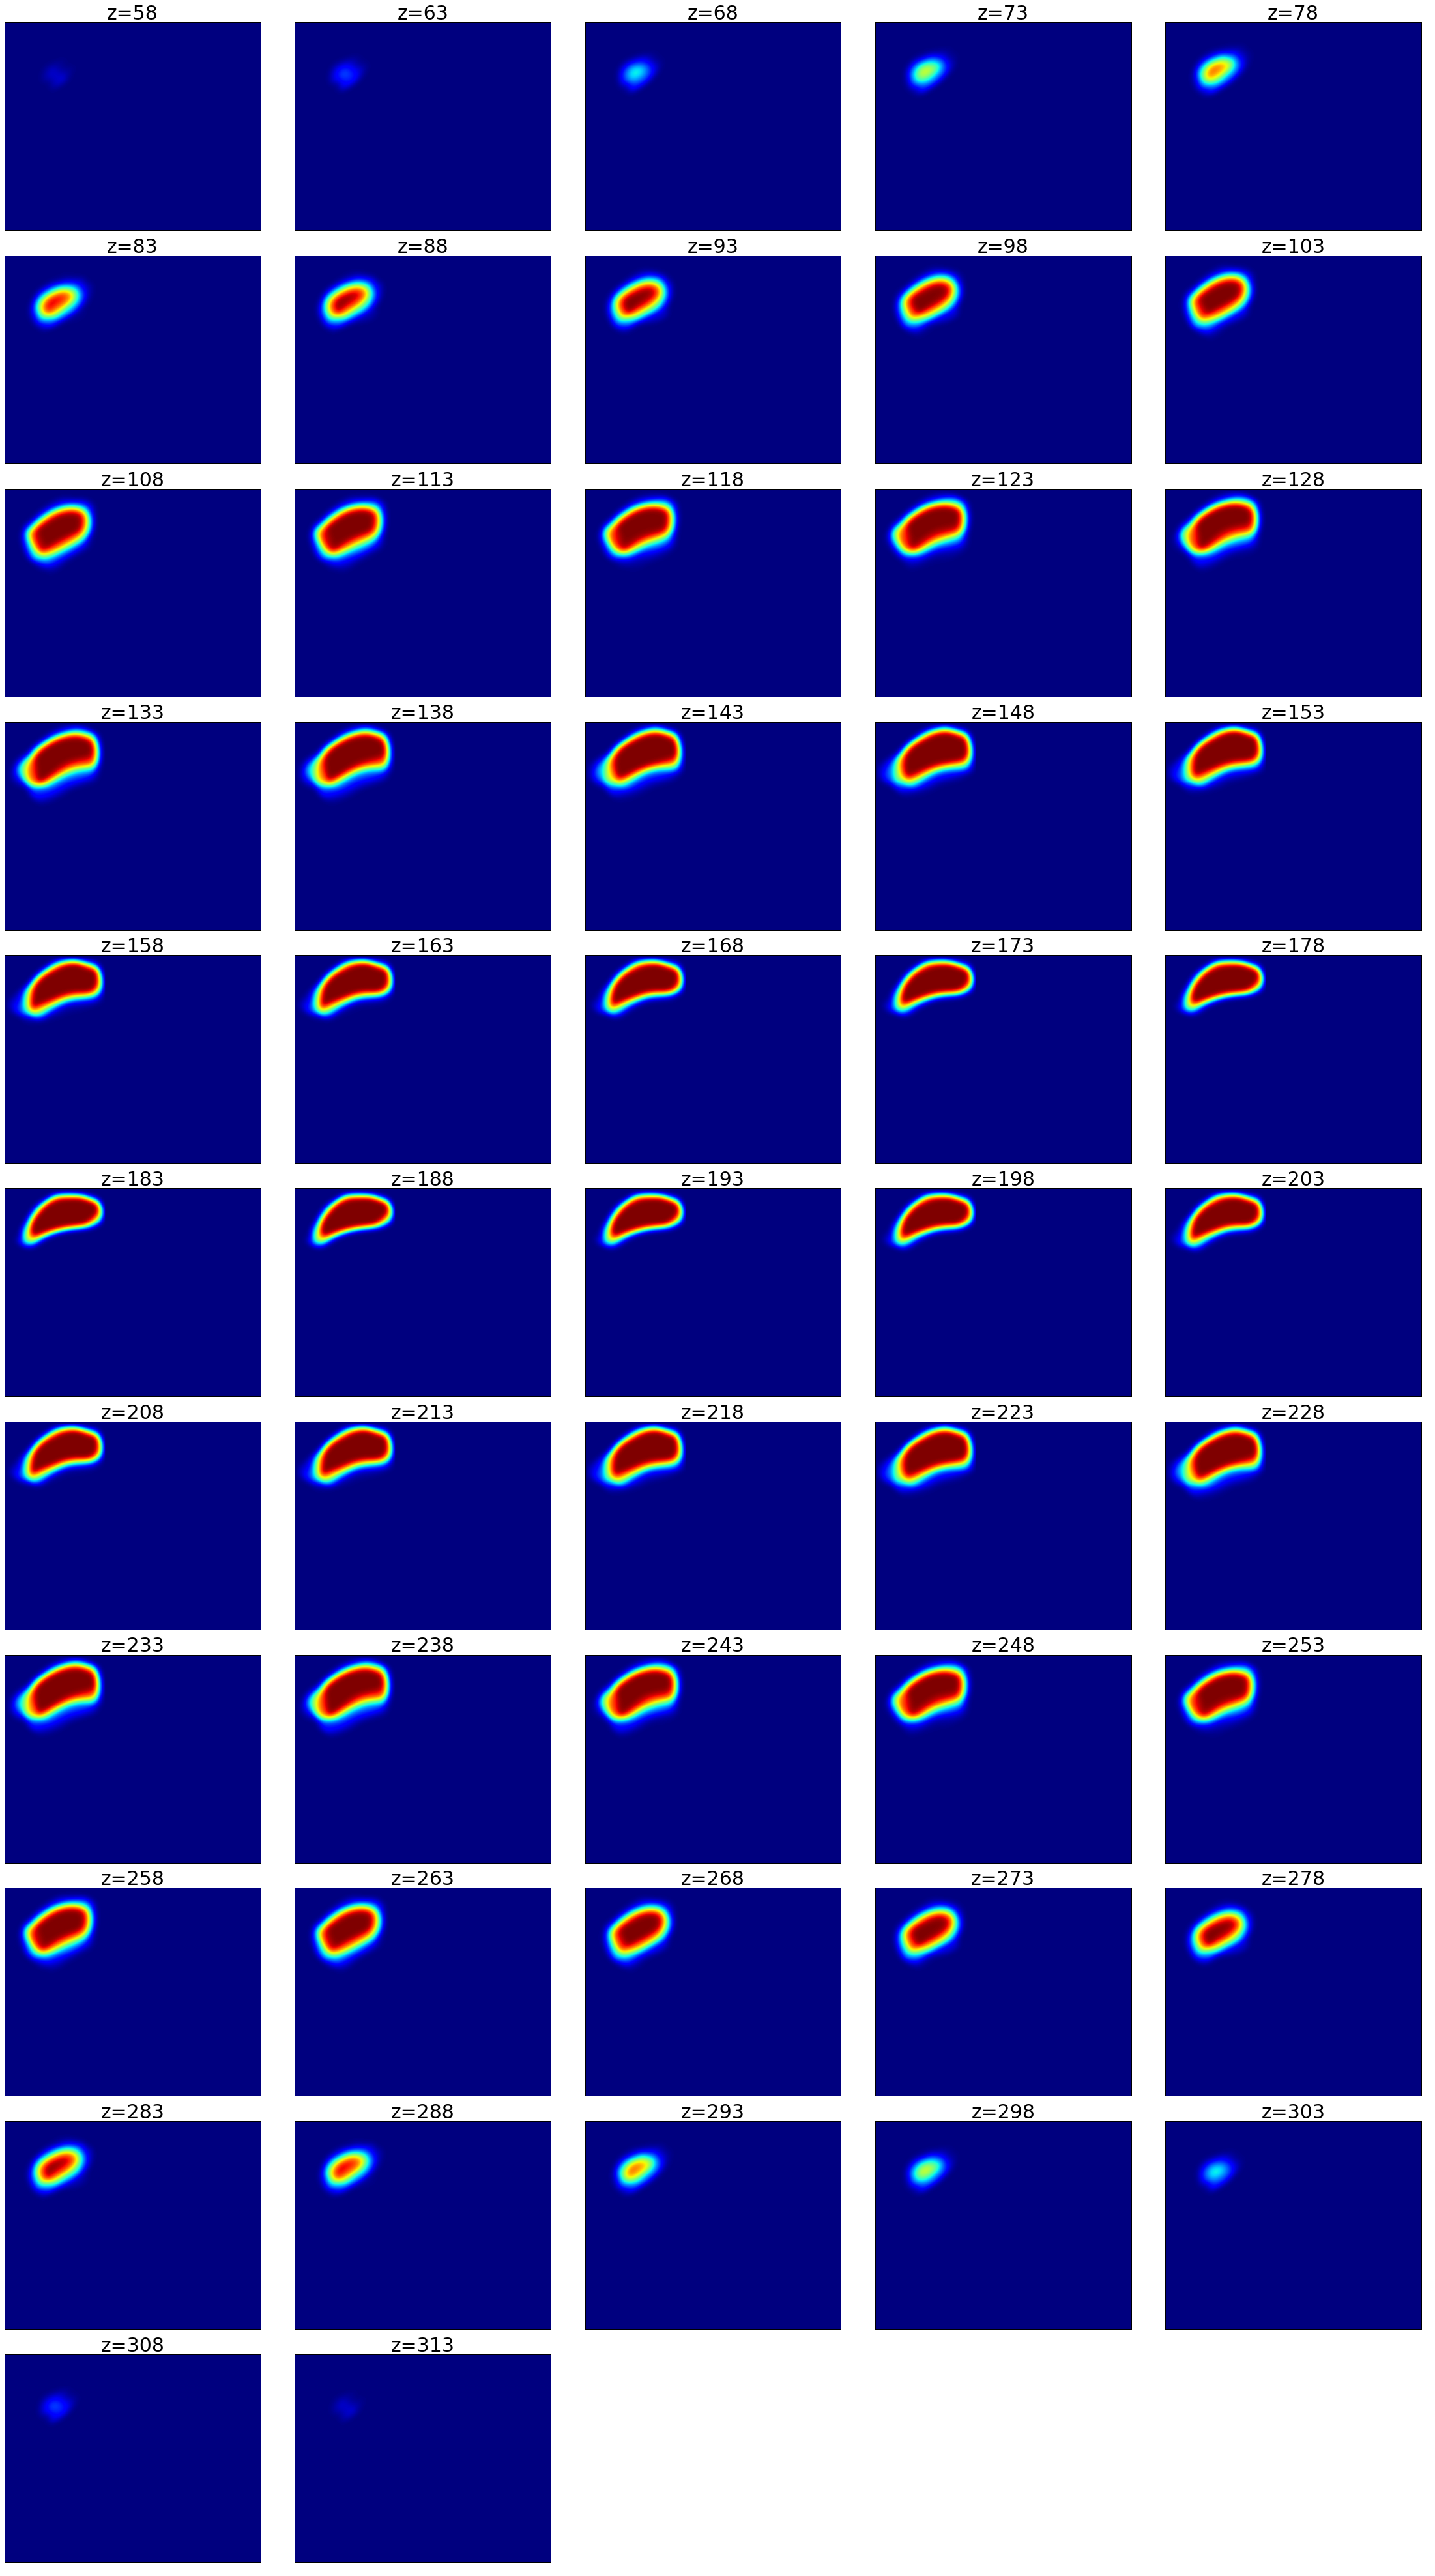

In [230]:
display_volume_sections(atlas_volume[structure_to_label['SC']], every=5, vmin=0, vmax=1)

# Compare atlasV4 and atlasV3

[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/probabilistic_shapes/atlasV4_down32_scoreVolume_sp5.bp'
Error loading probablistic shape for sp5.
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/probabilistic_shapes/atlasV4_down32_scoreVolume_outerContour.bp'
Error loading probablistic shape for outerContour.


78244


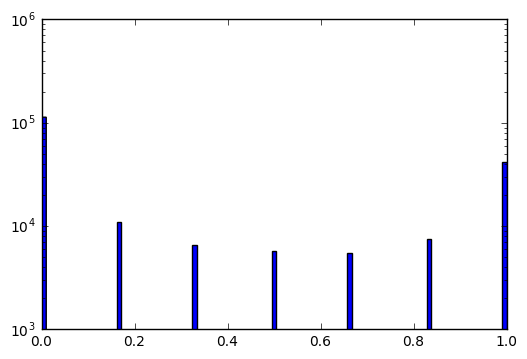

In [106]:
# atlasV4

structure_volumes = DataManager.load_prob_shapes(stack_m='atlasV4', trial_idx=None, sided=True)
print np.count_nonzero(structure_volumes['7N_R'][0])
plt.hist(structure_volumes['7N_R'][0].flatten(), bins=np.linspace(0.,1.,100), log=True);

[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/probabilistic_shapes/atlasV3_down32_scoreVolume_sp5.bp'
Error loading probablistic shape for sp5.
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/probabilistic_shapes/atlasV3_down32_scoreVolume_outerContour.bp'
Error loading probablistic shape for outerContour.


78850


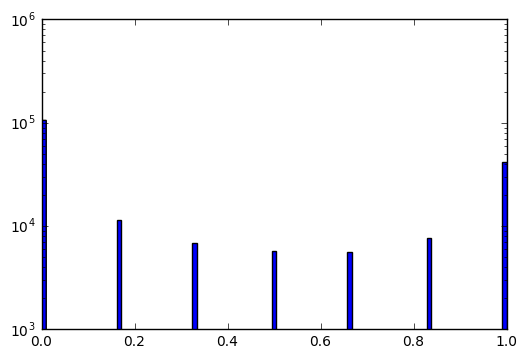

In [107]:
# atlasV3

structure_volumes = DataManager.load_prob_shapes(stack_m='atlasV3', trial_idx=None, sided=True)
print np.count_nonzero(structure_volumes['7N_R'][0])
plt.hist(structure_volumes['7N_R'][0].flatten(), bins=np.linspace(0.,1.,100), log=True);

# Create actors

In [243]:
all_atlas_structure_mesh_actors_rel2canon = [actor_mesh(polydata, np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.,
                                             wireframe=True) 
                                   for name_s, polydata in structure_meshes_rel2canon.iteritems()]

In [232]:
# all_atlas_structure_surround_mesh_actors = [actor_mesh(polydata, color=(1,1,1),
#                                                       wireframe=True) 
#                                             for n, polydata in atlas_space_structure_surround_meshes.iteritems()]

In [233]:
shell_actor = actor_mesh(shell_polydata, (1,1,1), opacity=.15, wireframe=False, origin=-canonical_centroid_rel2uncropped)

In [234]:
ann_vol_xmin_rel2uncropped, ann_vol_xmax_rel2uncropped, \
ann_vol_ymin_rel2uncropped, ann_vol_ymax_rel2uncropped, \
ann_vol_zmin_rel2uncropped, ann_vol_zmax_rel2uncropped = \
DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='annotation', downscale=32)

In [235]:
atlas_xmin_rel2uncropped, atlas_xmax_rel2uncropped, \
atlas_ymin_rel2uncropped, atlas_ymax_rel2uncropped, \
atlas_zmin_rel2uncropped, atlas_zmax_rel2uncropped = \
DataManager.load_original_volume_bbox(stack=atlas_name, volume_type='score', downscale=32, structure='7N_L')

In [242]:
# Visualize all structures as prob. volumes.

all_atlas_structure_volume_actors = []
for label, volume in atlas_volume.iteritems():
    name_s = label_to_structure[label]
    name_u = convert_to_original_name(name_s)
    if name_u == '5N':
        structure_volume_actor = actor_volume(volume.astype(np.float32), what='probability', 
                                              origin=np.array((atlas_xmin_rel2uncropped, atlas_ymin_rel2uncropped, atlas_zmin_rel2uncropped))-canonical_centroid_rel2uncropped,
                                              c=np.array(name_unsided_to_color[name_u])/255.)
        all_atlas_structure_volume_actors.append(structure_volume_actor)

In [237]:
structure_volume = bp.unpack_ndarray_file(DataManager.get_prob_shape_volume_filepath(stack_m=atlas_name, structure='5N_L', trial_idx=None))
structure_origin_rel2canon = np.loadtxt(DataManager.get_prob_shape_origin_filepath(stack_m=atlas_name, structure='5N_L', trial_idx=None))
# structure_volume, structure_origin_rel2canon = structure_volumes_rel2canon['5N_L']
one_structure_volume_actor = actor_volume(structure_volume.astype(np.float32), what='probability', 
                                              origin=structure_origin_rel2canon,
                                              c=np.array(name_unsided_to_color[name_u])/255.)

In [ ]:
# # Visualize all structures as prob. volumes.

# all_atlas_structure_volume_actors = []
# for label, (volume, origin) in atlas_space_structure_volumes.iteritems():
#     name_s = label_to_structure[label]
#     name_u = convert_to_original_name(name_s)
#     structure_volume_actor = actor_volume(volume.astype(np.float32), what='probability', origin=origin, c=structure_to_color[name_u])
#     all_atlas_structure_volume_actors.append(structure_volume_actor)

# Show actors

In [260]:
launch_vtk(all_atlas_structure_mesh_actors_rel2canon + [one_structure_volume_actor] + [shell_actor], init_angle='sagittal')

In [239]:
launch_vtk(all_atlas_structure_mesh_actors_rel2canon + all_atlas_structure_volume_actors, init_angle='sagittal')

In [229]:
launch_vtk([actor_mesh(atlas_space_structure_meshes_surround_included[n], color=(1,1,1), wireframe=True) 
           for n in ['SC', 'SC_surround_200']])

In [262]:
launch_vtk([actor_mesh(atlas_space_structure_meshes_surround_included['SC'], color=(1,1,1), wireframe=True, opacity=1.),
            actor_mesh(atlas_space_structure_meshes_surround_included['SC_surround_200'], color=(0,1,1), wireframe=True,
                      opacity=.2)])

In [227]:
launch_vtk([actor_mesh(atlas_space_structure_meshes['Sp5C_L'])])

In [68]:
launch_vtk(all_atlas_structure_mesh_actors, init_angle='coronal')

In [32]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_surround_mesh_actors)

In [39]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_volume_actors, init_angle='sagittal')

In [38]:
launch_vtk([actor_mesh(polydata, structure_colors[convert_name_to_unsided(n)]/255.) 
            for n, polydata in atlas_space_structure_meshes.iteritems()] + \
           [shell_actor], init_angle='30')

In [69]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='coronal')

In [33]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown')

In [31]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown', animate=False,
          interactive=False, snapshot_fn='/home/yuncong/snapshot_horizontal.png', snapshot_magnification=10)

In [30]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='sagittal', animate=False, 
           interactive=False, snapshot_fn='/home/yuncong/snapshot_sagittal.png', snapshot_magnification=10)

In [38]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal', animate=True)

In [74]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal')

In [39]:
launch_vtk(all_atlas_structure_volume_actors , init_angle='sagittal')